# Phenotype file creation for:
1. Hearing aids (f.3393)
2. Hearing difficulty/problems (f.2247)
3. Hearing difficulty/background noise (f.2257)
4. Combined phenotype (f2247 & f.2257)

## Aim

Create a dataset of filtered individuals using the inclusion and exclusion criteria for diverse hearing related phenotyes to perform association analyses using the LMM.ipynb. 

## Location of files

In the shared folder is the original UKBB data
```
/gpfs/gibbs/pi/dewan/data/UKBiobank/phenotype_files/pleiotropy_R01/ukb42495_updatedJune2020
```

In my personal folder the filtered dataset

```
/home/dc2325/project/HI_UKBB
```

In the phenotypes folder important phenotypic files 

```
/gpfs/gibbs/pi/dewan/data/UKBiobank/phenotype_files/hearing_impairment
```

## Add inclusion/exclusion criteria new cases with H90 codes

Date of change: 07/16/2020

## Important phenotypic files

1. `200804_UKBB_HI_genotypeqc.csv` File containing all individuals that passed QC and hearing impairment variables
2. `200804_UKBB_HI_genotypeqc_excr.csv` File with applied exclusion criteria as indicated [here](https://docs.google.com/document/d/1cpxTzElpsEkwmBDjnMBHg2wW7CL1AcG_b0_0wE_k5rQ/edit). **Note**: this file excludes individuals with otosclerosis, Meniere's and other diseases, if you need to filter those particular phenotypes use file 1 instead.
3. `200811_UKBB_Tinnitus_plan1_2_3_f4803` File with filtered phenotypes for tinnitus plan 1,2 and 3 and imputed noise variables
4. `200814_UKBB_HI_genotypeqc_excr_impvars` Database with qc'ed individuals, exclusion criteria, noise imputed vars and tinnitus phenotypes

## Analysis plan

The phenotypes to be analyzed are the following:

1. Hearing aid user (f.3393)
"Do you use a hearing aid most of the time?"

2. Hearing difficulty/problems (f.2247)
"Do you have any difficulty with your hearing?"

3. Hearing difficulty/background noise (f.2257)
"Do you find it difficult to follow a conversation if there is background noise (such as TV, radio, children playing)?"

**Sex corresponds to f.22001 (genetic sex):**

- Male = 0
- Female = 1

**Noisy workplace and loud music exposure frequency: same as for Tinnitus**
                
1. Remove inconsistent individuals 
    - said 1,2 or 3 and in following visits said 0
    - said a higher exposure (e.g 3) and then a lower one (e.g 1 or 2) in following visits
2. Retain consistent individuals and use highest reported exposure

**The SRT trait needs to be inverse normalized**

**Covariates to be included in the analysis include:**

1. Age at time of test (calculated from f.21003.0.0,f.21003.1.0,f.21003.2.0,f.21003.3.0)
2. Sex f.22001
3. Volume left ear f.4270 and right ear f.4277 (The volume set by the participant for the measurement which you are using in the analysis ir our case the last time they took the test). For the analysis we use the average of the right and left ear since there is overlap in the volume distribution
4. Noisy workplace f.4825
5. Loud music exposure f.4836


In [7]:
#Load libraries
library(plyr)
library(tidyverse)
library(pander)
library(ggpubr)
library(rapportools)
library(ggplot2)
#Get working directory
getwd()

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.3
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::arrange()   masks plyr::arrange()
✖ purrr::compact()   masks plyr::compact()
✖ dplyr::count()     masks plyr::count()
✖ dplyr::failwith()  masks plyr::failwith()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::id()        masks plyr::id()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::mutate()    masks plyr::mutate()
✖ dplyr::rename()    masks plyr::rename()
✖ dplyr::summarise() masks plyr::summarise()
✖ dplyr::summarize() masks plyr::summarize()

Loading required package: magrittr


Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract



Attaching package

[1] "/gpfs/gibbs/pi/dewan/data/UKBiobank/phenotype_files/hearing_impairment"

## Load imputed data

In [8]:
#Set working directory Yale
setwd('~/project/HI_UKBB/')
#Set working directory Columbia
#setwd('/mnt/mfs/statgen/UKBiobank/data/phenotype_files/hearing_impairment')

In [3]:
# Clean workspace
rm(list=ls())

### Using only white british

In [5]:
#df.final.imp = read.csv('200814_UKBB_HI_genotypeqc_excr_impvars.csv')
df.final.imp = read.csv('031221_UKBB_HI_genotypeqc_onlybritish_354343indiv_excr.csv')

### Using all whites

In [4]:
#df.final.imp = read.csv('120120_UKBB_HI_expandedwhite_genotypeqc_excr.csv')
df.final.imp = read.csv('010521_UKBB_HI_genotypeqc_expandedwhite_396974indiv_excr.csv')

## Load exome data

In [2]:
setwd('/gpfs/gibbs/pi/dewan/data/UKBiobank/phenotype_files/hearing_impairment')
df.final.imp = read.csv(file = '010621_UKBB_HI_exomes_182221ind_excr.csv', header=TRUE)

In [3]:
## Exome data with no outliers excluded and white expanded
setwd('/gpfs/gibbs/pi/dewan/data/UKBiobank/phenotype_files/hearing_impairment')
df.final.imp = read.csv(file = '062421_UKBB_HI_exomes_182761ind_excr.csv', header=TRUE)

In [4]:
head(df.final.imp)

,IID,FID,ignore1,ignore2,ignore3,ignore4,f.31.0.0,f.34.0.0,f.53.0.0,f.53.1.0,⋯,f.131229.0.0,f.131230.0.0,f.131231.0.0,f.131232.0.0,f.131233.0.0,f.131250.0.0,f.131251.0.0,f.131252.0.0,f.131253.0.0,exclude
,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<int>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<lgl>
1,1000019,1000019,0,0,2,-9,Female,1960,2008-01-24,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,FALSE
2,1000035,1000035,0,0,1,-9,Male,1944,2007-11-08,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,FALSE
3,1000078,1000078,0,0,2,-9,Female,1955,2007-08-20,2012-11-01,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,FALSE
4,1000081,1000081,0,0,1,-9,Male,1942,2009-12-03,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,FALSE
5,1000198,1000198,0,0,2,-9,Female,1967,2009-03-27,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,FALSE
6,1000210,1000210,0,0,1,-9,Male,1941,2008-02-11,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,FALSE


## Data summary and recode

In [5]:
#354347 only brits 1082 vars for exome data
#354343 only brits 2262 vars for imputed data
#396974 for expanded white imputed data
#182761 for expanded white exomed data
dim(df.final.imp) 

[1] 182761   2262

In [9]:
compare_sex <- df.final.imp %>% 
      mutate(sex_final = case_when(
       f.31.0.0 == f.22001.0.0 & f.22001.0.0 == "Female" ~ "0",
       f.31.0.0 == f.22001.0.0 & f.22001.0.0 == "Male" ~ "1",
       TRUE ~ '3')) %>%
    select(IID, f.31.0.0, f.22001.0.0, sex_final) %>%
    filter(sex_final==3)
head(compare_sex, 10)
dim(compare_sex) #Number of individuals inconsistent for self-reported and genetic sex

IID,f.31.0.0,f.22001.0.0,sex_final
<int>,<fct>,<fct>,<chr>


[1] 0 4

## Remove sex inconsistent individuals (apply only to exome data)

In [8]:
remove_sex <- compare_sex %>% 
    select(IID)
head(remove_sex)
dim(remove_sex)

IID
<int>


[1] 0 1

In [ ]:
df.final.imp <-  df.final.imp[!df.final.imp$IID %in% remove_sex$IID,]
dim(df.final.imp)

## Create sex var and revalue

In [10]:
df.final.imp$sex <- revalue(df.final.imp$f.22001.0.0, c("Male" = '0', 'Female'='1' ))
table(df.final.imp$sex)
dim(df.final.imp)


     1      0 
100979  81782 

[1] 182761   2263

In [11]:
length(which(is.na(df.final.imp$sex)))

[1] 0

# f.3393 Hearing aid: filter out inconsistent cases

In [12]:
# Recode function:
recode<-function(df,column_name){
  new_names<-c()
  for (i in column_name){
    new_column_name<-paste0(i,"_recode")
    new_names<-c(new_names,new_column_name)
    df[,new_column_name] <- revalue(df[,i], c("No"= 0, 
                                            "Yes" =1,
                                            "Prefer not to answer"= NA))
  }
  return (list(df=df,new_column_names=new_names))
}

# columns needs to be recoded:
column_name<-c("f.3393.0.0","f.3393.1.0","f.3393.2.0","f.3393.3.0")

# get a new data.frame with recoded columns added:
df.final.imp<-recode(df=df.final.imp,column_name)$df

# get names of recoded columns:
new_column_names<-recode(df=df.final.imp,column_name)$new_column_names

# show recode summary:
for (i in new_column_names)
{cat(i,"summary:");print(table(df.final.imp[,i]));cat("\n")}

The following `from` values were not present in `x`: Prefer not to answer

The following `from` values were not present in `x`: Prefer not to answer



f.3393.0.0_recode summary:
     0      1 
113374   4938 

f.3393.1.0_recode summary:
   0    1 
8974  480 

f.3393.2.0_recode summary:
    0     1 
22280  1749 

f.3393.3.0_recode summary:
  0   1 
869  67 



In [13]:
dim(df.final.imp)

[1] 182761   2267

## f. 3393 Get patterns for possible answers

In [14]:
# Extract subset of data only with the recode columns
data_sub <- df.final.imp %>%
  select("IID",all_of(new_column_names)) 

# Function to extract all the available answers for 4 visits
# and put them in one string as "0000", "111", "991", etc

f2<-function(x){
  visit<-''
  for (i in 2:5){ # do not take the first column (i.e. IID)
    if (!is.na(x[i]))
    {visit<-paste0(visit,x[i])}
  }
  if(is.null(visit)){visit==NA}
  else{visit=visit}
  return (visit)
}

# Apply the above function and remove NAs
data_sub$visit<-apply(data_sub, 1, f2)

names(table(data_sub$visit))

[1] ""     "0"    "00"   "000"  "0000" "0001" "001"  "0010" "0011" "01"  
[11] "010"  "011"  "0111" "1"    "10"   "100"  "101"  "11"   "110"  "1100"
[21] "111"  "1111"

In [15]:
table(data_sub$visit)
all_pattern<-unique(data_sub$visit)


            0     00    000   0000   0001    001   0010   0011     01    010 
 54027 103869  15389   2967    104      2    149      2      1    983     19 
   011   0111      1     10    100    101     11    110   1100    111   1111 
   128      3   4487     39      6     14    465      2      1    100      4 

## f.3393 Get all the consistent cases

In [16]:
all_no<-all_pattern[which(grepl("0",all_pattern) & !grepl("1",all_pattern))]
all_yes<-all_pattern[which(!grepl("0",all_pattern) & grepl("1",all_pattern))]
table(data_sub[data_sub$visit%in%union(all_no,all_yes),"visit"])


     0     00    000   0000      1     11    111   1111 
103869  15389   2967    104   4487    465    100      4 

In [17]:
consistent_1<-c(all_no,all_yes)
yes_no<-all_pattern[which(grepl("0",all_pattern) & grepl("1",all_pattern))]
table(data_sub[data_sub$visit%in%yes_no,"visit"])


0001  001 0010 0011   01  010  011 0111   10  100  101  110 1100 
   2  149    2    1  983   19  128    3   39    6   14    2    1 

In [18]:
might_inconsistent<-c(yes_no)

## Review individuals with Z97.4 "Presence of external hearing-aid" in ICD10 code

In [19]:
ICD10_z974 <- df.final.imp %>%
    mutate(z974_include = apply(select(df.final.imp,starts_with("f.41270")),1,function(x) any(x %in% c("Z974")))) %>%
    select(IID, f.31.0.0,f.34.0.0, starts_with("f.41270"), starts_with("f.41280"), z974_include ) %>%
    filter(z974_include == TRUE)
nrow(ICD10_z974)    #380 individuals with hearing aid

[1] 163

In [20]:
head(ICD10_z974)

,IID,f.31.0.0,f.34.0.0,f.41270.0.0,f.41270.0.1,f.41270.0.2,f.41270.0.3,f.41270.0.4,f.41270.0.5,f.41270.0.6,⋯,f.41280.0.204,f.41280.0.205,f.41280.0.206,f.41280.0.207,f.41280.0.208,f.41280.0.209,f.41280.0.210,f.41280.0.211,f.41280.0.212,z974_include
,<int>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<lgl>
1,1019013,Male,1938,D122,H833,H911,H919,I730,I849,J310,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,TRUE
2,1084042,Female,1942,B370,C56,C770,C772,C782,C785,C786,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,TRUE
3,1140560,Male,1940,B07,C443,G560,H919,I10,I209,I459,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,TRUE
4,1141212,Male,1940,C61,E538,E780,E785,G319,H024,I10,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,TRUE
5,1168646,Male,1940,C163,C164,C169,C771,C772,C792,D610,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,TRUE
6,1215421,Male,1941,D122,D127,H919,I10,I460,I841,I842,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,TRUE


In [21]:
icd10_f3393 <- data_sub %>%
    filter(IID %in% ICD10_z974$IID ) %>%
    filter(!(is.empty(visit) | visit %in% all_no))
head(icd10_f3393) #202 individuals with both ICD10 Z97.4 and f3393 data
nrow(icd10_f3393)
icd10_notf3393 <- data_sub %>%
    filter(IID %in% ICD10_z974$IID ) %>%
    filter(is.empty(visit) | visit %in% all_no)
head(icd10_notf3393)
nrow(icd10_notf3393) # 178 individuals with ICD10 Z97.4 and without data for f3393

,IID,f.3393.0.0_recode,f.3393.1.0_recode,f.3393.2.0_recode,f.3393.3.0_recode,visit
,<int>,<fct>,<fct>,<fct>,<fct>,<chr>
1,1084042,1,NA,NA,NA,1
2,1140560,1,NA,NA,NA,1
3,1141212,1,NA,NA,NA,1
4,1239811,1,1,NA,NA,11
5,1302179,1,NA,NA,NA,1
6,1372161,1,NA,NA,NA,1


[1] 95

,IID,f.3393.0.0_recode,f.3393.1.0_recode,f.3393.2.0_recode,f.3393.3.0_recode,visit
,<int>,<fct>,<fct>,<fct>,<fct>,<chr>
1,1019013,0,NA,NA,NA,0
2,1168646,0,NA,NA,NA,0
3,1215421,0,NA,NA,NA,0
4,1486238,0,NA,NA,NA,0
5,1493176,0,NA,NA,NA,0
6,1621401,0,NA,NA,NA,0


[1] 68

## Get the age for 178 individuals with Z97.4 on ICD10 codes

In [22]:
hearing_aid = df.final.imp %>% 
  select(IID,FID,f.31.0.0,f.34.0.0, starts_with("f.41270"),starts_with("f.41280"))
dim(hearing_aid)

[1] 182761    430

In [23]:
hearing_aid_new = hearing_aid %>% 
  mutate(cases = apply(select(hearing_aid,starts_with("f.41270")), 1, function(x) any(x %in% c("Z974")))) %>% 
    filter(IID%in%icd10_notf3393$IID)
nrow(hearing_aid_new)

[1] 68

In [24]:
offset = which(colnames(hearing_aid_new) == 'f.41280.0.0') - which(colnames(hearing_aid_new) == 'f.41270.0.0')
offset

[1] 213

In [25]:
hearing_aid_new$age_aid = apply(hearing_aid_new, 1, function(x) {
  hear_aid = which(x[grep("f.41270", names(x))] == "Z974")
  first_index_offset = grep("f.41270", names(x))[1] - 1
  unlist(x[hear_aid[length(hear_aid)] + first_index_offset + offset])
})
hearing_aid_new2 <- hearing_aid_new %>% 
  separate(age_aid, into = c("year", "month", "day"), sep = "-") %>% 
  mutate(num_year=as.numeric(year))
  
hearing_aid_new3 <- hearing_aid_new2 %>%   
  mutate(age_final_aid= num_year-f.34.0.0) %>%
  mutate(hearing_aid_cat = case_when(cases==TRUE ~ 1, cases==FALSE ~ 0))

head(hearing_aid_new3)
dim(hearing_aid_new3)

,IID,FID,f.31.0.0,f.34.0.0,f.41270.0.0,f.41270.0.1,f.41270.0.2,f.41270.0.3,f.41270.0.4,f.41270.0.5,⋯,f.41280.0.210,f.41280.0.211,f.41280.0.212,cases,year,month,day,num_year,age_final_aid,hearing_aid_cat
,<int>,<int>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<lgl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,1019013,1019013,Male,1938,D122,H833,H911,H919,I730,I849,⋯,NA,NA,NA,TRUE,2009,01,23,2009,71,1
2,1168646,1168646,Male,1940,C163,C164,C169,C771,C772,C792,⋯,NA,NA,NA,TRUE,2010,11,24,2010,70,1
3,1215421,1215421,Male,1941,D122,D127,H919,I10,I460,I841,⋯,NA,NA,NA,TRUE,2012,05,23,2012,71,1
4,1486238,1486238,Male,1948,E669,E780,H028,I10,J181,J439,⋯,NA,NA,NA,TRUE,2014,09,27,2014,66,1
5,1493176,1493176,Male,1942,E119,E149,F171,H919,I10,I652,⋯,NA,NA,NA,TRUE,2014,11,14,2014,72,1
6,1621401,1621401,Male,1946,A047,A099,A419,A498,B343,C119,⋯,NA,NA,NA,TRUE,2017,03,17,2017,71,1


[1]  68 437

In [26]:
hearing_aid_z974 <- hearing_aid_new3 %>%
    select("IID", "age_final_aid")

In [27]:
length(which(hearing_aid_new3$age_final_aid <40))

[1] 0

In [28]:
length(which(is.na(hearing_aid_new3$age_final_aid)))

[1] 0

In [29]:
merge_icd10_aid_f3393 <- left_join(ICD10_z974, data_sub) 
data_sub_2 <- merge_icd10_aid_f3393 %>% select("IID", ends_with("_recode"), "visit", "z974_include") %>%
    filter(z974_include == TRUE)
head(data_sub_2, 100)
nrow(data_sub_2)

Joining, by = "IID"



,IID,f.3393.0.0_recode,f.3393.1.0_recode,f.3393.2.0_recode,f.3393.3.0_recode,visit,z974_include
,<int>,<fct>,<fct>,<fct>,<fct>,<chr>,<lgl>
1,1019013,0,NA,NA,NA,0,TRUE
2,1084042,1,NA,NA,NA,1,TRUE
3,1140560,1,NA,NA,NA,1,TRUE
4,1141212,1,NA,NA,NA,1,TRUE
5,1168646,0,NA,NA,NA,0,TRUE
6,1215421,0,NA,NA,NA,0,TRUE
7,1239811,1,1,NA,NA,11,TRUE
8,1302179,1,NA,NA,NA,1,TRUE
9,1372161,1,NA,NA,NA,1,TRUE


[1] 163

In [30]:
nrow(filter(data_sub_2, is.empty(visit) | visit == ""))

[1] 10

## f.3393 Remove inconsistent cases

In [31]:
# get all the inconsistent cases:
exceptions<-c("0001","001","0011","01","011","0111")
inconsistent<-setdiff(might_inconsistent,exceptions)

cat("There are",length(which(is.empty(data_sub$visit))),"NAs, removed\n")
cat("There are",length(which(data_sub$visit%in%inconsistent)),"inconsistent cases, removed")

There are 54027 NAs, removed
There are 83 inconsistent cases, removed

In [32]:
# which of the individuals are inconsistent for f.3393 in the full dataset
inconsistent_f3393  <- data_sub %>%
  filter((visit%in%inconsistent)) %>%
  select(IID)
nrow(inconsistent_f3393)
# which individuals have empty values for f.3393 in the full dataset
empty_f3393  <- data_sub %>%
  filter((is.empty(visit))) %>%
  select(IID)
nrow(empty_f3393)

[1] 83

[1] 54027

In [31]:
# Create a bd with inconsistent individuals
write.table(inconsistent_f3393, 'inconsistent_hearing_aif_f3393', quote = FALSE, row.names = FALSE)

In [33]:
# How many of the individuals have Z97.4 field and are inconsistent according to f.3393 data
length(which(merge_icd10_aid_f3393$IID%in%inconsistent_f3393$IID))

[1] 0

In [34]:
# How many of the individuals have Z97.4 field and have empty data for f.3393
to_keep_icd10 <- merge_icd10_aid_f3393 %>%
    filter(IID%in%empty_f3393$IID) %>%
    select(IID)
head(to_keep_icd10)
nrow(to_keep_icd10)

,IID
,<int>
1,1648454
2,1689328
3,2312984
4,3103358
5,3138286
6,3410852


[1] 10

In [35]:
# Filter out the 30 individuals from the set of those with empty values for f.3393
to_remove_na<-setdiff(empty_f3393,to_keep_icd10)
nrow(to_remove_na)

[1] 54017

In [36]:
# removed those with NAs and inconsistent cases: we are left with #230,437 individuals
IID_hearing_aid<-data_sub %>%
  filter(!(IID%in%to_remove_na$IID)) %>%
  filter((!visit%in%inconsistent)) %>%
  select(IID)

dim(IID_hearing_aid)

[1] 128661      1

In [37]:
IID_hearing_aid<-IID_hearing_aid[,1]
cat("After removing all the NAs and inconsistent cases, there are",length(IID_hearing_aid)," individuals left")

After removing all the NAs and inconsistent cases, there are 128661  individuals left

In [38]:
# get the dataset after cleansing: 
df.hearing.aid<-df.final.imp %>%
  filter(IID%in%IID_hearing_aid)

dim(df.hearing.aid)

[1] 128661   2267

## f.3393 Step 1: classify cases and controls

In [39]:
hearing_aid <- df.hearing.aid %>% 
  mutate(z974_include = apply(select(df.hearing.aid,starts_with("f.41270")),1,function(x) any(x %in% c('Z974')))) %>%
  select(IID,FID,f.22001.0.0, f.21003.0.0,f.21003.1.0,f.21003.2.0,f.21003.3.0,f.3393.0.0_recode,f.3393.1.0_recode,f.3393.2.0_recode,f.3393.3.0_recode,z974_include)
head(hearing_aid)

,IID,FID,f.22001.0.0,f.21003.0.0,f.21003.1.0,f.21003.2.0,f.21003.3.0,f.3393.0.0_recode,f.3393.1.0_recode,f.3393.2.0_recode,f.3393.3.0_recode,z974_include
,<int>,<int>,<fct>,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<lgl>
1,1000019,1000019,Female,47,NA,NA,NA,0,NA,NA,NA,FALSE
2,1000035,1000035,Male,63,NA,NA,NA,0,NA,NA,NA,FALSE
3,1000078,1000078,Female,52,57,60,NA,NA,0,0,NA,FALSE
4,1000081,1000081,Male,67,NA,NA,NA,0,NA,NA,NA,FALSE
5,1000198,1000198,Female,41,NA,NA,NA,0,NA,NA,NA,FALSE
6,1000236,1000236,Male,61,NA,70,NA,0,NA,0,NA,FALSE


In [40]:
nrow(data_sub)

[1] 182761

## Hearing aid f.3393

In [41]:
data_sub <- select(hearing_aid,starts_with("f.3393"))

# Function to define cases
f<-function(x){
  visit<-c()
  for (i in 1:4){
    if (!is.na(x[i]))
    {visit<-c(visit,x[i])}
  }
  if (("1" %in% visit)){result= TRUE}
  else{result=FALSE}
  return (result)
}

# Apply the above function
hearing_aid$cases<-apply(data_sub, 1, f)
head(hearing_aid,10)

,IID,FID,f.22001.0.0,f.21003.0.0,f.21003.1.0,f.21003.2.0,f.21003.3.0,f.3393.0.0_recode,f.3393.1.0_recode,f.3393.2.0_recode,f.3393.3.0_recode,z974_include,cases
,<int>,<int>,<fct>,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<lgl>,<lgl>
1,1000019,1000019,Female,47,NA,NA,NA,0,NA,NA,NA,FALSE,FALSE
2,1000035,1000035,Male,63,NA,NA,NA,0,NA,NA,NA,FALSE,FALSE
3,1000078,1000078,Female,52,57,60,NA,NA,0,0,NA,FALSE,FALSE
4,1000081,1000081,Male,67,NA,NA,NA,0,NA,NA,NA,FALSE,FALSE
5,1000198,1000198,Female,41,NA,NA,NA,0,NA,NA,NA,FALSE,FALSE
6,1000236,1000236,Male,61,NA,70,NA,0,NA,0,NA,FALSE,FALSE
7,1000255,1000255,Female,51,NA,61,NA,0,NA,0,NA,FALSE,FALSE
8,1000304,1000304,Female,56,NA,NA,NA,0,NA,NA,NA,FALSE,FALSE
9,1000331,1000331,Female,53,NA,NA,NA,0,NA,NA,NA,FALSE,FALSE


In [42]:
nrow(hearing_aid %>%
    filter( z974_include == TRUE & cases == TRUE))

[1] 95

In [43]:
nrow(hearing_aid %>%
    filter( z974_include == TRUE & cases == FALSE))

[1] 68

In [44]:
hearing_aid_cases <- hearing_aid %>% 
  filter(cases == TRUE )
head(hearing_aid_cases)
cat(dim(hearing_aid_cases)[1] + nrow(hearing_aid_z974) , "individuals are cases for f.3393")

,IID,FID,f.22001.0.0,f.21003.0.0,f.21003.1.0,f.21003.2.0,f.21003.3.0,f.3393.0.0_recode,f.3393.1.0_recode,f.3393.2.0_recode,f.3393.3.0_recode,z974_include,cases
,<int>,<int>,<fct>,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<lgl>,<lgl>
1,1001384,1001384,Female,61,NA,NA,NA,1,NA,NA,NA,FALSE,TRUE
2,1002548,1002548,Male,62,NA,NA,NA,1,NA,NA,NA,FALSE,TRUE
3,1002888,1002888,Male,68,NA,NA,NA,1,NA,NA,NA,FALSE,TRUE
4,1002944,1002944,Male,65,NA,NA,NA,1,NA,NA,NA,FALSE,TRUE
5,1003258,1003258,Male,69,74,NA,NA,0,1,NA,NA,FALSE,TRUE
6,1004843,1004843,Male,64,NA,NA,NA,1,NA,NA,NA,FALSE,TRUE


6390 individuals are cases for f.3393

In [45]:
hearing_aid_controls <- hearing_aid %>% 
  filter(cases == FALSE & z974_include == FALSE)
head(hearing_aid_controls)
cat(dim(hearing_aid_controls)[1], "individuals are controls for f.3393")

,IID,FID,f.22001.0.0,f.21003.0.0,f.21003.1.0,f.21003.2.0,f.21003.3.0,f.3393.0.0_recode,f.3393.1.0_recode,f.3393.2.0_recode,f.3393.3.0_recode,z974_include,cases
,<int>,<int>,<fct>,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<lgl>,<lgl>
1,1000019,1000019,Female,47,NA,NA,NA,0,NA,NA,NA,FALSE,FALSE
2,1000035,1000035,Male,63,NA,NA,NA,0,NA,NA,NA,FALSE,FALSE
3,1000078,1000078,Female,52,57,60,NA,NA,0,0,NA,FALSE,FALSE
4,1000081,1000081,Male,67,NA,NA,NA,0,NA,NA,NA,FALSE,FALSE
5,1000198,1000198,Female,41,NA,NA,NA,0,NA,NA,NA,FALSE,FALSE
6,1000236,1000236,Male,61,NA,70,NA,0,NA,0,NA,FALSE,FALSE


122271 individuals are controls for f.3393

In [46]:
# These are the 178 that have data for z97.4
dim(hearing_aid)[1] - nrow(hearing_aid_cases) - nrow(hearing_aid_controls)

[1] 68

## f.3393 Recode cases=1 and controls=0

In [47]:
hearing_aid$hearing_aid_cat <- as.integer(as.logical(hearing_aid$cases))
head(hearing_aid, 10)
# Get the number of NAs
#length(which(is.na(hearing_all$hearing_aid_cat)))

,IID,FID,f.22001.0.0,f.21003.0.0,f.21003.1.0,f.21003.2.0,f.21003.3.0,f.3393.0.0_recode,f.3393.1.0_recode,f.3393.2.0_recode,f.3393.3.0_recode,z974_include,cases,hearing_aid_cat
,<int>,<int>,<fct>,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<lgl>,<lgl>,<int>
1,1000019,1000019,Female,47,NA,NA,NA,0,NA,NA,NA,FALSE,FALSE,0
2,1000035,1000035,Male,63,NA,NA,NA,0,NA,NA,NA,FALSE,FALSE,0
3,1000078,1000078,Female,52,57,60,NA,NA,0,0,NA,FALSE,FALSE,0
4,1000081,1000081,Male,67,NA,NA,NA,0,NA,NA,NA,FALSE,FALSE,0
5,1000198,1000198,Female,41,NA,NA,NA,0,NA,NA,NA,FALSE,FALSE,0
6,1000236,1000236,Male,61,NA,70,NA,0,NA,0,NA,FALSE,FALSE,0
7,1000255,1000255,Female,51,NA,61,NA,0,NA,0,NA,FALSE,FALSE,0
8,1000304,1000304,Female,56,NA,NA,NA,0,NA,NA,NA,FALSE,FALSE,0
9,1000331,1000331,Female,53,NA,NA,NA,0,NA,NA,NA,FALSE,FALSE,0


In [48]:
dim(hearing_aid)

[1] 128661     14

## Step 2: get the ages for hearing aids (f.3393)

In [49]:
# Get the subset data of cases
aid_age_cases = hearing_aid %>% 
  filter(hearing_aid_cat=="1")  %>%
  select(IID, f.3393.0.0_recode, f.3393.1.0_recode, f.3393.2.0_recode, f.3393.3.0_recode, f.21003.0.0, f.21003.1.0, f.21003.2.0, f.21003.3.0)
head(aid_age_cases,12)
nrow(aid_age_cases)

,IID,f.3393.0.0_recode,f.3393.1.0_recode,f.3393.2.0_recode,f.3393.3.0_recode,f.21003.0.0,f.21003.1.0,f.21003.2.0,f.21003.3.0
,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>
1,1001384,1,NA,NA,NA,61,NA,NA,NA
2,1002548,1,NA,NA,NA,62,NA,NA,NA
3,1002888,1,NA,NA,NA,68,NA,NA,NA
4,1002944,1,NA,NA,NA,65,NA,NA,NA
5,1003258,0,1,NA,NA,69,74,NA,NA
6,1004843,1,NA,NA,NA,64,NA,NA,NA
7,1006454,1,NA,NA,NA,64,NA,NA,NA
8,1006513,0,NA,1,NA,54,NA,59,NA
9,1007725,1,NA,NA,NA,69,NA,NA,NA


[1] 6322

In [50]:
# Get the # of column where first replied Yes:
aid_age_cases$visit_idx = apply(aid_age_cases, 1, function(x) unlist(which(x == '1')))
head(aid_age_cases)

,IID,f.3393.0.0_recode,f.3393.1.0_recode,f.3393.2.0_recode,f.3393.3.0_recode,f.21003.0.0,f.21003.1.0,f.21003.2.0,f.21003.3.0,visit_idx
,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<list>
1,1001384,1,NA,NA,NA,61,NA,NA,NA,2
2,1002548,1,NA,NA,NA,62,NA,NA,NA,2
3,1002888,1,NA,NA,NA,68,NA,NA,NA,2
4,1002944,1,NA,NA,NA,65,NA,NA,NA,2
5,1003258,0,1,NA,NA,69,74,NA,NA,3
6,1004843,1,NA,NA,NA,64,NA,NA,NA,2


In [51]:
# Define offset:
# offset: refers to the # of columns between the first age column (i.e.f.21003.0.0) and the first recode column (i.e.f.3393.0.0_recode)
offset = which(colnames(aid_age_cases) == 'f.21003.0.0') - which(colnames(aid_age_cases) == 'f.3393.0.0_recode')

# Define the function to extract the first time they said yes for cases 
f=get_age_func <- function(x) {
  visit_index=x[which(colnames(aid_age_cases)=="visit_idx")]
  index=min(unlist(visit_index))+offset
  age=x[index]
  final_age=unlist(age)
  if(is.null(final_age))
  {final_age<-NA}
  return(final_age)
}

# Get the final age for cases
aid_age_cases$age_final_aid = apply(aid_age_cases, 1, f)

# Show first 6 rows
head(aid_age_cases)
summary(aid_age_cases$age_final_aid)

,IID,f.3393.0.0_recode,f.3393.1.0_recode,f.3393.2.0_recode,f.3393.3.0_recode,f.21003.0.0,f.21003.1.0,f.21003.2.0,f.21003.3.0,visit_idx,age_final_aid
,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<list>,<int>
1,1001384,1,NA,NA,NA,61,NA,NA,NA,2,61
2,1002548,1,NA,NA,NA,62,NA,NA,NA,2,62
3,1002888,1,NA,NA,NA,68,NA,NA,NA,2,68
4,1002944,1,NA,NA,NA,65,NA,NA,NA,2,65
5,1003258,0,1,NA,NA,69,74,NA,NA,3,74
6,1004843,1,NA,NA,NA,64,NA,NA,NA,2,64


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  40.00   61.00   65.00   63.85   68.00   82.00 

In [52]:
length(which(aid_age_cases$age_final_aid < 40))
length(which(is.na(aid_age_cases$age_final_aid)))

[1] 0

[1] 0

In [53]:
### Extract age for Control (3393)
aid_age_control <- hearing_aid %>% 
  filter(hearing_aid_cat == "0" & z974_include == FALSE) %>%
  select(IID, f.3393.0.0_recode, f.3393.1.0_recode, f.3393.2.0_recode, f.3393.3.0_recode, f.21003.0.0, f.21003.1.0, f.21003.2.0, f.21003.3.0)
head(aid_age_control)
nrow(aid_age_control)

,IID,f.3393.0.0_recode,f.3393.1.0_recode,f.3393.2.0_recode,f.3393.3.0_recode,f.21003.0.0,f.21003.1.0,f.21003.2.0,f.21003.3.0
,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>
1,1000019,0,NA,NA,NA,47,NA,NA,NA
2,1000035,0,NA,NA,NA,63,NA,NA,NA
3,1000078,NA,0,0,NA,52,57,60,NA
4,1000081,0,NA,NA,NA,67,NA,NA,NA
5,1000198,0,NA,NA,NA,41,NA,NA,NA
6,1000236,0,NA,0,NA,61,NA,70,NA


[1] 122271

In [54]:
# Get the # of column where last replied No:
aid_age_control$visit_idx = apply(aid_age_control, 1, function(x) unlist(which(x == '0')))
                                  
# Define offset:
# offset: refers to the # of columns between the first age column (i.e.f.21003.0.0) and the first recode column (i.e.f.3393.0.0_recode)
offset = which(colnames(aid_age_control) == 'f.21003.0.0') - which(colnames(aid_age_control) == 'f.3393.0.0_recode')
# Define the function to extract the last time they said no for control

f=get_age_func <- function(x) {
  visit_index=x[which(colnames(aid_age_control)=="visit_idx")]
  index=max(unlist(visit_index))+offset
  age=x[index]
  age=unlist(age)
  if(is.null(age))
  {age<-NA}
  return(age)
}
# Get the final age for controls
aid_age_control$age_final_aid = apply(aid_age_control, 1, f)

# Show first 6 rows
head(aid_age_control)
summary(aid_age_control$age_final_aid)

,IID,f.3393.0.0_recode,f.3393.1.0_recode,f.3393.2.0_recode,f.3393.3.0_recode,f.21003.0.0,f.21003.1.0,f.21003.2.0,f.21003.3.0,visit_idx,age_final_aid
,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<list>,<int>
1,1000019,0,NA,NA,NA,47,NA,NA,NA,2,47
2,1000035,0,NA,NA,NA,63,NA,NA,NA,2,63
3,1000078,NA,0,0,NA,52,57,60,NA,"3, 4",60
4,1000081,0,NA,NA,NA,67,NA,NA,NA,2,67
5,1000198,0,NA,NA,NA,41,NA,NA,NA,2,41
6,1000236,0,NA,0,NA,61,NA,70,NA,"2, 4",70


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  39.00   52.00   60.00   58.41   65.00   82.00 

In [55]:
length(which(aid_age_control$age_final_aid < 50))
length(which(is.na(aid_age_control$age_final_aid)))

[1] 21233

[1] 0

In [56]:
# Merge age_cases and age_controls
aid_age_cases <- aid_age_cases %>%
    select("IID", "age_final_aid")
aid_age_control <- aid_age_control %>%
    select("IID", "age_final_aid")
hearing_aid_age <- rbind(aid_age_cases, aid_age_control, hearing_aid_z974 ) 
dim(hearing_aid_age)
head(hearing_aid_age)

[1] 128661      2

,IID,age_final_aid
,<int>,<dbl>
1,1001384,61
2,1002548,62
3,1002888,68
4,1002944,65
5,1003258,74
6,1004843,64


In [57]:
hearing_aid_age %>% filter(is.na(age_final_aid))

IID,age_final_aid
<int>,<dbl>


In [58]:
length(which(is.na(hearing_aid_age$age_final_aid)))

[1] 0

In [59]:
hearing_cat_age = merge(x = hearing_aid ,y = hearing_aid_age [,c("IID","age_final_aid")],by="IID", all.x=TRUE)
head(hearing_cat_age)
dim(hearing_cat_age)

,IID,FID,f.22001.0.0,f.21003.0.0,f.21003.1.0,f.21003.2.0,f.21003.3.0,f.3393.0.0_recode,f.3393.1.0_recode,f.3393.2.0_recode,f.3393.3.0_recode,z974_include,cases,hearing_aid_cat,age_final_aid
,<int>,<int>,<fct>,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<lgl>,<lgl>,<int>,<dbl>
1,1000019,1000019,Female,47,NA,NA,NA,0,NA,NA,NA,FALSE,FALSE,0,47
2,1000035,1000035,Male,63,NA,NA,NA,0,NA,NA,NA,FALSE,FALSE,0,63
3,1000078,1000078,Female,52,57,60,NA,NA,0,0,NA,FALSE,FALSE,0,60
4,1000081,1000081,Male,67,NA,NA,NA,0,NA,NA,NA,FALSE,FALSE,0,67
5,1000198,1000198,Female,41,NA,NA,NA,0,NA,NA,NA,FALSE,FALSE,0,41
6,1000236,1000236,Male,61,NA,70,NA,0,NA,0,NA,FALSE,FALSE,0,70


[1] 128661     15

In [60]:
hearing_cat_age <- hearing_cat_age %>% 
    mutate(hearing_aid_cat_new = case_when((cases==TRUE | z974_include ==TRUE) ~ 1, (cases==FALSE & z974_include==FALSE)~ 0))
head(hearing_cat_age)

,IID,FID,f.22001.0.0,f.21003.0.0,f.21003.1.0,f.21003.2.0,f.21003.3.0,f.3393.0.0_recode,f.3393.1.0_recode,f.3393.2.0_recode,f.3393.3.0_recode,z974_include,cases,hearing_aid_cat,age_final_aid,hearing_aid_cat_new
,<int>,<int>,<fct>,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<lgl>,<lgl>,<int>,<dbl>,<dbl>
1,1000019,1000019,Female,47,NA,NA,NA,0,NA,NA,NA,FALSE,FALSE,0,47,0
2,1000035,1000035,Male,63,NA,NA,NA,0,NA,NA,NA,FALSE,FALSE,0,63,0
3,1000078,1000078,Female,52,57,60,NA,NA,0,0,NA,FALSE,FALSE,0,60,0
4,1000081,1000081,Male,67,NA,NA,NA,0,NA,NA,NA,FALSE,FALSE,0,67,0
5,1000198,1000198,Female,41,NA,NA,NA,0,NA,NA,NA,FALSE,FALSE,0,41,0
6,1000236,1000236,Male,61,NA,70,NA,0,NA,0,NA,FALSE,FALSE,0,70,0


In [61]:
nrow(hearing_cat_age %>% filter(hearing_aid_cat_new == "1"))
nrow(hearing_cat_age %>% filter(hearing_aid_cat_new == "0"))

[1] 6390

[1] 122271

In [62]:
#Merge with complete database keep the all the rows from original db
df_3393 = merge(x = df.final.imp, y = hearing_cat_age [,c("IID","hearing_aid_cat_new","age_final_aid")],by="IID", all.x=TRUE)
dim(df_3393)
head(df_3393)

[1] 182761   2269

,IID,FID,ignore1,ignore2,ignore3,ignore4,f.31.0.0,f.34.0.0,f.53.0.0,f.53.1.0,⋯,f.131252.0.0,f.131253.0.0,exclude,sex,f.3393.0.0_recode,f.3393.1.0_recode,f.3393.2.0_recode,f.3393.3.0_recode,hearing_aid_cat_new,age_final_aid
,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<int>,<fct>,<fct>,⋯,<fct>,<fct>,<lgl>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>
1,1000019,1000019,0,0,2,-9,Female,1960,2008-01-24,NA,⋯,NA,NA,FALSE,1,0,NA,NA,NA,0,47
2,1000035,1000035,0,0,1,-9,Male,1944,2007-11-08,NA,⋯,NA,NA,FALSE,0,0,NA,NA,NA,0,63
3,1000078,1000078,0,0,2,-9,Female,1955,2007-08-20,2012-11-01,⋯,NA,NA,FALSE,1,NA,0,0,NA,0,60
4,1000081,1000081,0,0,1,-9,Male,1942,2009-12-03,NA,⋯,NA,NA,FALSE,0,0,NA,NA,NA,0,67
5,1000198,1000198,0,0,2,-9,Female,1967,2009-03-27,NA,⋯,NA,NA,FALSE,1,0,NA,NA,NA,0,41
6,1000210,1000210,0,0,1,-9,Male,1941,2008-02-11,NA,⋯,NA,NA,FALSE,0,NA,NA,NA,NA,NA,NA


## Export file for hearing aid analysis f.3393

In [64]:
f.3393_pheno <- df_3393 %>%
    filter(!(is.na(hearing_aid_cat_new))) %>%
    select(FID, IID, age_final_aid, sex, hearing_aid_cat_new) 
#%>%mutate(hearing_aid_cat=recode_factor(hearing_aid_cat, `1`="case",`0`="control"), sex=recode_factor(sex, `1`="male", `0`="female" ))
head(f.3393_pheno)
dim(f.3393_pheno)

,FID,IID,age_final_aid,sex,hearing_aid_cat_new
,<int>,<int>,<dbl>,<fct>,<dbl>
1,1000019,1000019,47,1,0
2,1000035,1000035,63,0,0
3,1000078,1000078,60,1,0
4,1000081,1000081,67,0,0
5,1000198,1000198,41,1,0
6,1000236,1000236,70,0,0


[1] 128661      5

## Histogram for age of cases and controls

In [65]:
mu <- ddply(f.3393_pheno, "hearing_aid_cat_new", summarise, grp.mean=mean(age_final_aid))
head(mu)

,hearing_aid_cat_new,grp.mean
,<dbl>,<dbl>
1,0,58.41244
2,1,63.91095


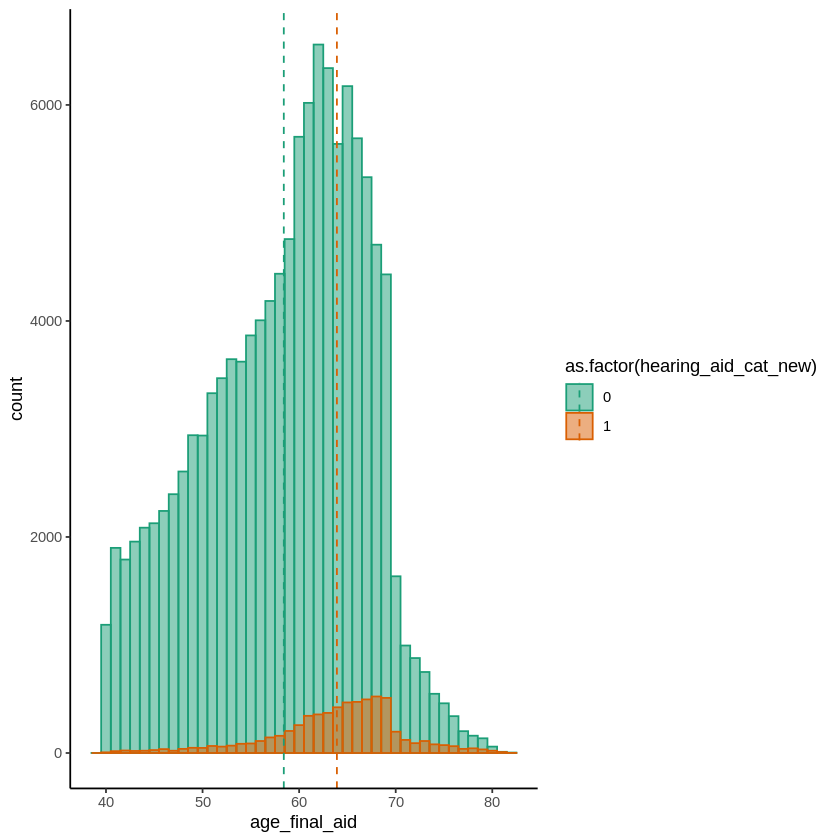

In [66]:
ggplot(f.3393_pheno, aes(x=age_final_aid, fill=as.factor(hearing_aid_cat_new), color=as.factor(hearing_aid_cat_new))) +
 geom_histogram(binwidth=1, alpha=0.5, position="identity")+
  scale_color_brewer(palette="Dark2")+
  scale_fill_brewer(palette="Dark2") +
  theme(legend.position="top") +
  geom_vline(data=mu, aes(xintercept=grp.mean, color=as.factor(hearing_aid_cat_new)),
             linetype="dashed") +
  theme_classic()

In [67]:
length(which((f.3393_pheno$hearing_aid_cat=="0" & f.3393_pheno$age_final_aid <50)))

[1] 21233

In [68]:
length(which((f.3393_pheno$hearing_aid_cat=="1" & f.3393_pheno$age_final_aid <50)))

[1] 256

In [69]:
mu1 <- ddply(f.3393_pheno, "sex", summarise, grp.mean=mean(age_final_aid))
head(mu1)

,sex,grp.mean
,<fct>,<dbl>
1,1,58.31905
2,0,59.09568


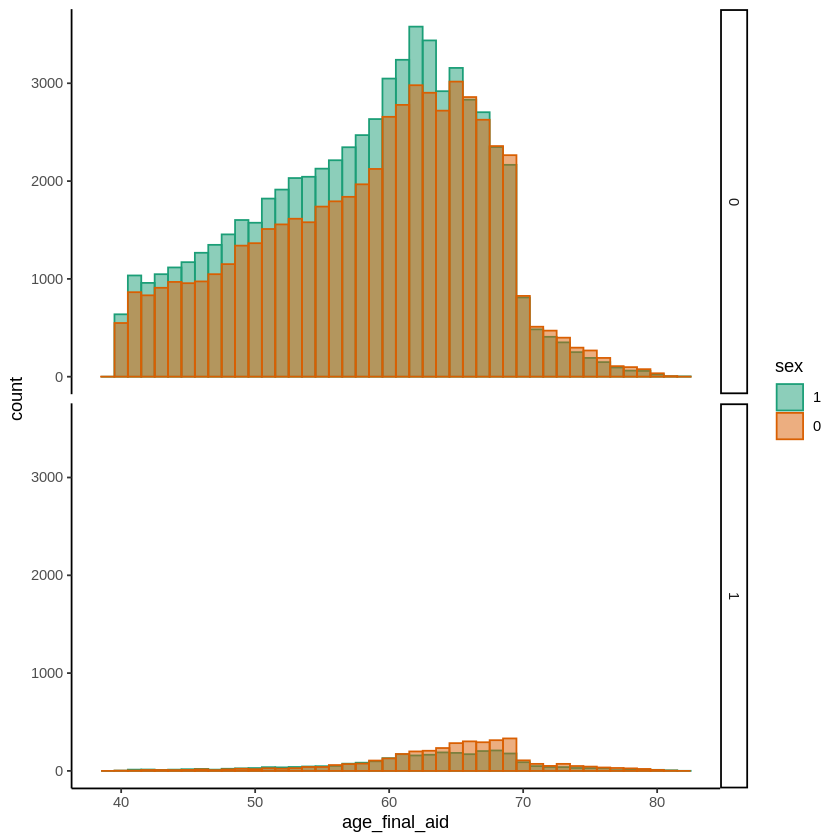

In [70]:
ggplot(f.3393_pheno, aes(x=age_final_aid, fill=sex, color=sex)) +
 geom_histogram(binwidth=1, alpha=0.5, position="identity")+
  scale_color_brewer(palette="Dark2")+
  scale_fill_brewer(palette="Dark2") +
  theme(legend.position="top") +
  theme_classic() +
  facet_grid(hearing_aid_cat_new ~ .)

## Find out controls positive for f.2247 & f.2257

In [71]:
control_check_3393 <- df_3393 %>%
    filter(hearing_aid_cat_new==0) %>%
    select(FID, IID, age_final_aid, sex, hearing_aid_cat_new, starts_with("f.2247"), starts_with("f.2257")) %>%
    mutate(remove_2247 = apply(select(.,starts_with("f.2247")), 1, function(x) length(which(x == "Yes")) > 0),
           remove_2257 = apply(select(.,starts_with("f.2257")), 1, function(x) length(which(x == "Yes")) > 0))
head(control_check_3393)
dim(control_check_3393)

,FID,IID,age_final_aid,sex,hearing_aid_cat_new,f.2247.0.0,f.2247.1.0,f.2247.2.0,f.2247.3.0,f.2257.0.0,f.2257.1.0,f.2257.2.0,f.2257.3.0,remove_2247,remove_2257
,<int>,<int>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<lgl>,<lgl>
1,1000019,1000019,47,1,0,Yes,NA,NA,NA,Yes,NA,NA,NA,TRUE,TRUE
2,1000035,1000035,63,0,0,No,NA,NA,NA,Yes,NA,NA,NA,FALSE,TRUE
3,1000078,1000078,60,1,0,No,No,No,NA,No,No,No,NA,FALSE,FALSE
4,1000081,1000081,67,0,0,No,NA,NA,NA,No,NA,NA,NA,FALSE,FALSE
5,1000198,1000198,41,1,0,Yes,NA,NA,NA,Yes,NA,NA,NA,TRUE,TRUE
6,1000236,1000236,70,0,0,No,NA,No,NA,No,NA,No,NA,FALSE,FALSE


[1] 122271     15

In [72]:
length(which(control_check_3393$remove_2247==TRUE)) #controls that replied yes to f.2247
length(which(control_check_3393$remove_2257==TRUE)) #controls that replied yes to f.2257
length(which(control_check_3393$remove_2247==TRUE & control_check_3393$remove_2257==TRUE)) # controls that replied yes to both
length(which(control_check_3393$remove_2247==TRUE | control_check_3393$remove_2257==TRUE)) # controls that replied yes to either

[1] 42065

[1] 64421

[1] 34691

[1] 71795

### Export files only white-British

In [44]:
write.table(f.3393_pheno, '200828_UKBB_Hearing_aid_f3393', quote = FALSE, row.names = FALSE)

### Export files expanded white

In [44]:
write.table(f.3393_pheno, '120120_UKBB_Hearing_aid_f3393_expandedwhite', quote = FALSE, row.names = FALSE)

In [92]:
write.table(f.3393_pheno, '041421_UKBB_Hearing_aid_f3393_expandedwhite_z974included', quote = FALSE, row.names = FALSE)

### Export files exome data

In [53]:
write.table(f.3393_pheno, 'phenotypes_exome_data/010421_UKBB_Hearing_aid_f3393_128254ind_exomes', quote = FALSE, row.names = FALSE)

## Hearing difficulty/problems (2247)
### step1: classify cases and controls

In [73]:
table(df.final.imp$f.2247.0.0)
dim(df.final.imp)


         Do not know I am completely deaf                   No 
                7629                   28               130324 
Prefer not to answer                  Yes 
                 129                44376 

[1] 182761   2267

In [74]:
# Recode function:
recode<-function(df,column_name){
  new_names<-c()
  for (i in column_name){
    new_column_name<-paste0(i,"_recode")
    new_names<-c(new_names,new_column_name)
    df[,new_column_name] <- revalue(df[,i], c("No"= 0, 
                                            "Yes" =1,
                                            "Prefer not to answer"= NA,
                                             "Do not know"=9,
                                             "I am completely deaf"=NA))
  }
  return (list(df=df,new_column_names=new_names))
}

# columns needs to be recoded:
column_name<-c("f.2247.0.0","f.2247.1.0","f.2247.2.0","f.2247.3.0")

# get a new data.frame with recoded columns added:
df.final.imp<-recode(df=df.final.imp,column_name)$df

# get names of recoded columns:
new_column_names<-recode(df=df.final.imp,column_name)$new_column_names

# show recode summary:
for (i in new_column_names)
{cat(i,"summary:");print(table(df.final.imp[,i]));cat("\n")}

The following `from` values were not present in `x`: Prefer not to answer, I am completely deaf

The following `from` values were not present in `x`: Prefer not to answer, I am completely deaf



f.2247.0.0_recode summary:
     9      0      1 
  7629 130324  44376 

f.2247.1.0_recode summary:
   9    0    1 
 520 6031 2903 

f.2247.2.0_recode summary:
    9     0     1 
 1281 14855  7897 

f.2247.3.0_recode summary:
  9   0   1 
 47 563 326 



## f.2247 Get possible answers

In [75]:
# Extract subset of data only with the recode columns of tinnitus
data_sub <- df.final.imp %>%
  select("IID",all_of(new_column_names)) 

# Function to extract all the available answers for 4 visits
# and put them in one string as "0000", "111", "991", etc

f2<-function(x){
  visit<-''
  for (i in 2:5){ # do not take the first column (i.e. IID)
    if (!is.na(x[i]))
    {visit<-paste0(visit,x[i])}
  }
  if(is.null(visit)){visit=NA}
  else{visit=visit}
  return (visit)
}

# Apply the above function and remove NAs
data_sub$visit<-apply(data_sub, 1, f2)

names(table(data_sub$visit))

[1] ""     "0"    "00"   "000"  "0000" "0001" "0009" "001"  "0010" "0011"
[11] "0019" "009"  "0090" "0091" "0099" "01"   "010"  "0100" "0101" "011" 
[21] "0111" "019"  "09"   "090"  "0900" "0901" "091"  "0910" "0911" "099" 
[31] "0991" "1"    "10"   "100"  "1000" "101"  "109"  "1090" "1099" "11"  
[41] "110"  "1101" "111"  "1111" "1119" "119"  "1190" "1191" "19"   "190" 
[51] "1900" "191"  "199"  "9"    "90"   "900"  "9000" "901"  "909"  "91"  
[61] "910"  "911"  "9110" "9111" "919"  "99"   "990"  "991"  "999"

In [76]:
table(data_sub$visit)
all_pattern<-unique(data_sub$visit)


            0     00    000   0000   0001   0009    001   0010   0011   0019 
   347 109838  12751   2932     77     10      6    339      3      7      1 
   009   0090   0091   0099     01    010   0100   0101    011   0111    019 
   110      3      1      1   2715    130      3      1    384      7     29 
    09    090   0900   0901    091   0910   0911    099   0991      1     10 
   822     95      1      2     50      1      1     49      1  37651    862 
   100   1000    101    109   1090   1099     11    110   1101    111   1111 
   117      1     78      8      1      1   4306     82      1    953     26 
  1119    119   1190   1191     19    190   1900    191    199      9     90 
     1     30      1      1    239     17      1     16     14   6565    344 
   900   9000    901    909     91    910    911   9110   9111    919     99 
    55      3     10     21    335      8     62      1      1      2    173 
   990    991    999 
    23     16     18 

## f.2247 Get all the consistent cases

In [77]:
all_no<-all_pattern[which(grepl("0",all_pattern) & !grepl("9",all_pattern) & !grepl("1",all_pattern))]
all_yes<-all_pattern[which(!grepl("0",all_pattern) & !grepl("9",all_pattern) & grepl("1",all_pattern))]
all_do_not_know<-all_pattern[which(!grepl("0",all_pattern) & grepl("9",all_pattern) & !grepl("1",all_pattern))]
table(data_sub[data_sub$visit%in%union(union(all_no,all_yes),all_do_not_know),"visit"])


     0     00    000   0000      1     11    111   1111      9     99    999 
109838  12751   2932     77  37651   4306    953     26   6565    173     18 

In [78]:
consistent_1<-c(all_no,all_yes,all_do_not_know)

# might be inconsistent cases:
do_not_know_no<-all_pattern[which(grepl("0",all_pattern) & grepl("9",all_pattern) & !grepl("1",all_pattern))]
table(data_sub[data_sub$visit%in%do_not_know_no,"visit"])


0009  009 0090 0099   09  090 0900  099   90  900 9000  909  990 
   6  110    3    1  822   95    1   49  344   55    3   21   23 

In [79]:
do_not_know_yes<-all_pattern[which(!grepl("0",all_pattern) & grepl("9",all_pattern) & grepl("1",all_pattern))]
table(data_sub[data_sub$visit%in%do_not_know_yes,"visit"])


1119  119 1191   19  191  199   91  911 9111  919  991 
   1   30    1  239   16   14  335   62    1    2   16 

In [80]:
yes_no<-all_pattern[which(grepl("0",all_pattern) & !grepl("9",all_pattern) & grepl("1",all_pattern))]
table(data_sub[data_sub$visit%in%yes_no,"visit"])


0001  001 0010 0011   01  010 0100 0101  011 0111   10  100 1000  101  110 1101 
  10  339    3    7 2715  130    3    1  384    7  862  117    1   78   82    1 

In [81]:
with_all_three<-all_pattern[which(grepl("0",all_pattern) & grepl("9",all_pattern) & grepl("1",all_pattern))]
table(data_sub[data_sub$visit%in%with_all_three,"visit"])


0019 0091  019 0901  091 0910 0911 0991  109 1090 1099 1190  190 1900  901  910 
   1    1   29    2   50    1    1    1    8    1    1    1   17    1   10    8 
9110 
   1 

In [82]:
might_inconsistent<-c(do_not_know_no,do_not_know_yes,yes_no,with_all_three)

## f.2247 Remove inconsistent cases

In [83]:
# get all the inconsistent cases:
exceptions<-c("91","911","9111","991","0001","001","0011","01","011","0111", "0091", "091","0911","0991","9001","901","9011")
inconsistent<-setdiff(might_inconsistent,exceptions)

cat("There are",length(which(is.empty(data_sub$visit))),"NAs, removed")

There are 347 NAs, removed

In [84]:
cat("There are",length(which(data_sub$visit%in%inconsistent)),"inconsistent cases, removed")

There are 3185 inconsistent cases, removed

In [85]:
# removed those NAs, consistent for do not know - 9 and inconsistent cases: 
IID_hearing_diff<-data_sub %>%
  filter(!is.empty(visit)) %>%
  filter((!visit%in%inconsistent)) %>%
  filter((!visit%in%all_do_not_know)) %>%
  select(IID)

dim(IID_hearing_diff)

[1] 172473      1

In [86]:
IID_hearing_diff<-IID_hearing_diff[,1]
cat("After removing all the NAs and inconsistent cases, there are",length(IID_hearing_diff),"cases left")

After removing all the NAs and inconsistent cases, there are 172473 cases left

In [87]:
# get the dataset after cleansing: 
df.hearing.diff<-df.final.imp %>%
  filter(IID%in%IID_hearing_diff)

dim(df.hearing.diff)

[1] 172473   2271

## f.2247 Step 1 classify cases and controls

In [88]:
hearing_diff <- df.hearing.diff %>% 
  select(IID,FID,f.22001.0.0, f.21003.0.0,f.21003.1.0,f.21003.2.0,f.21003.3.0,f.2247.0.0_recode,f.2247.1.0_recode,f.2247.2.0_recode,f.2247.3.0_recode)
head(hearing_diff)

,IID,FID,f.22001.0.0,f.21003.0.0,f.21003.1.0,f.21003.2.0,f.21003.3.0,f.2247.0.0_recode,f.2247.1.0_recode,f.2247.2.0_recode,f.2247.3.0_recode
,<int>,<int>,<fct>,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<fct>
1,1000019,1000019,Female,47,NA,NA,NA,1,NA,NA,NA
2,1000035,1000035,Male,63,NA,NA,NA,0,NA,NA,NA
3,1000078,1000078,Female,52,57,60,NA,0,0,0,NA
4,1000081,1000081,Male,67,NA,NA,NA,0,NA,NA,NA
5,1000198,1000198,Female,41,NA,NA,NA,1,NA,NA,NA
6,1000224,1000224,Female,58,NA,NA,NA,0,NA,NA,NA


In [89]:
data_sub <- select(hearing_diff,starts_with("f.2247"))

# Function to define cases
f<-function(x){
  visit<-c()
  for (i in 1:4){
    if (!is.na(x[i]))
    {visit<-c(visit,x[i])}
  }
  if ("1" %in% visit){result= TRUE}
  else{result=FALSE}
  return (result)
}

# Apply the above function
hearing_diff$cases<-apply(data_sub, 1, f)
head(hearing_diff,10)

,IID,FID,f.22001.0.0,f.21003.0.0,f.21003.1.0,f.21003.2.0,f.21003.3.0,f.2247.0.0_recode,f.2247.1.0_recode,f.2247.2.0_recode,f.2247.3.0_recode,cases
,<int>,<int>,<fct>,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<lgl>
1,1000019,1000019,Female,47,NA,NA,NA,1,NA,NA,NA,TRUE
2,1000035,1000035,Male,63,NA,NA,NA,0,NA,NA,NA,FALSE
3,1000078,1000078,Female,52,57,60,NA,0,0,0,NA,FALSE
4,1000081,1000081,Male,67,NA,NA,NA,0,NA,NA,NA,FALSE
5,1000198,1000198,Female,41,NA,NA,NA,1,NA,NA,NA,TRUE
6,1000224,1000224,Female,58,NA,NA,NA,0,NA,NA,NA,FALSE
7,1000236,1000236,Male,61,NA,70,NA,0,NA,0,NA,FALSE
8,1000255,1000255,Female,51,NA,61,NA,0,NA,0,NA,FALSE
9,1000291,1000291,Male,62,NA,NA,NA,0,NA,NA,NA,FALSE


In [90]:
hearing_diff_cases <- hearing_diff %>% 
  filter(cases == TRUE)
head(hearing_diff_cases)
cat(dim(hearing_diff_cases)[1], "individuals are cases for f.2247")

,IID,FID,f.22001.0.0,f.21003.0.0,f.21003.1.0,f.21003.2.0,f.21003.3.0,f.2247.0.0_recode,f.2247.1.0_recode,f.2247.2.0_recode,f.2247.3.0_recode,cases
,<int>,<int>,<fct>,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<lgl>
1,1000019,1000019,Female,47,NA,NA,NA,1,NA,NA,NA,TRUE
2,1000198,1000198,Female,41,NA,NA,NA,1,NA,NA,NA,TRUE
3,1000396,1000396,Male,48,NA,NA,NA,1,NA,NA,NA,TRUE
4,1000494,1000494,Male,61,NA,NA,NA,1,NA,NA,NA,TRUE
5,1001076,1001076,Male,69,NA,NA,NA,1,NA,NA,NA,TRUE
6,1001123,1001123,Female,62,NA,NA,NA,1,NA,NA,NA,TRUE


46875 individuals are cases for f.2247

In [91]:
hearing_diff_controls <- hearing_diff %>% 
  filter(cases == FALSE)
head(hearing_diff_controls)
cat(dim(hearing_diff_controls)[1], "individuals are controls for f.2247")

,IID,FID,f.22001.0.0,f.21003.0.0,f.21003.1.0,f.21003.2.0,f.21003.3.0,f.2247.0.0_recode,f.2247.1.0_recode,f.2247.2.0_recode,f.2247.3.0_recode,cases
,<int>,<int>,<fct>,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<lgl>
1,1000035,1000035,Male,63,NA,NA,NA,0,NA,NA,NA,FALSE
2,1000078,1000078,Female,52,57,60,NA,0,0,0,NA,FALSE
3,1000081,1000081,Male,67,NA,NA,NA,0,NA,NA,NA,FALSE
4,1000224,1000224,Female,58,NA,NA,NA,0,NA,NA,NA,FALSE
5,1000236,1000236,Male,61,NA,70,NA,0,NA,0,NA,FALSE
6,1000255,1000255,Female,51,NA,61,NA,0,NA,0,NA,FALSE


125598 individuals are controls for f.2247

In [92]:
dim(hearing_diff)[1]-nrow(hearing_diff_controls )- nrow(hearing_diff_cases)

[1] 0

## f.2247 Recode cases=1 and controls=0

In [93]:
hearing_diff$hearing_diff_cat <- as.integer(as.logical(hearing_diff$cases))
head(hearing_diff, 10)
# Get the number of NAs
length(which(is.na(hearing_diff$hearing_dif_cat)))

,IID,FID,f.22001.0.0,f.21003.0.0,f.21003.1.0,f.21003.2.0,f.21003.3.0,f.2247.0.0_recode,f.2247.1.0_recode,f.2247.2.0_recode,f.2247.3.0_recode,cases,hearing_diff_cat
,<int>,<int>,<fct>,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<lgl>,<int>
1,1000019,1000019,Female,47,NA,NA,NA,1,NA,NA,NA,TRUE,1
2,1000035,1000035,Male,63,NA,NA,NA,0,NA,NA,NA,FALSE,0
3,1000078,1000078,Female,52,57,60,NA,0,0,0,NA,FALSE,0
4,1000081,1000081,Male,67,NA,NA,NA,0,NA,NA,NA,FALSE,0
5,1000198,1000198,Female,41,NA,NA,NA,1,NA,NA,NA,TRUE,1
6,1000224,1000224,Female,58,NA,NA,NA,0,NA,NA,NA,FALSE,0
7,1000236,1000236,Male,61,NA,70,NA,0,NA,0,NA,FALSE,0
8,1000255,1000255,Female,51,NA,61,NA,0,NA,0,NA,FALSE,0
9,1000291,1000291,Male,62,NA,NA,NA,0,NA,NA,NA,FALSE,0


[1] 0

## f.2247 Step 2: get the ages for hearing difficulty

In [94]:
# Get the subset data of cases
diff_age_cases = hearing_diff %>% 
  filter(hearing_diff_cat=="1")  %>%
  select(IID, f.2247.0.0_recode, f.2247.1.0_recode, f.2247.2.0_recode, f.2247.3.0_recode, f.21003.0.0, f.21003.1.0, f.21003.2.0, f.21003.3.0)
head(diff_age_cases,12)

,IID,f.2247.0.0_recode,f.2247.1.0_recode,f.2247.2.0_recode,f.2247.3.0_recode,f.21003.0.0,f.21003.1.0,f.21003.2.0,f.21003.3.0
,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>
1,1000019,1,NA,NA,NA,47,NA,NA,NA
2,1000198,1,NA,NA,NA,41,NA,NA,NA
3,1000396,1,NA,NA,NA,48,NA,NA,NA
4,1000494,1,NA,NA,NA,61,NA,NA,NA
5,1001076,1,NA,NA,NA,69,NA,NA,NA
6,1001123,1,NA,NA,NA,62,NA,NA,NA
7,1001316,0,NA,1,NA,45,NA,51,NA
8,1001373,1,NA,NA,NA,67,NA,NA,NA
9,1001384,1,NA,NA,NA,61,NA,NA,NA


In [95]:
# Get the # of column where first replied Yes:
diff_age_cases$visit_idx = apply(diff_age_cases, 1, function(x) unlist(which(x == '1')))
head(diff_age_cases)

,IID,f.2247.0.0_recode,f.2247.1.0_recode,f.2247.2.0_recode,f.2247.3.0_recode,f.21003.0.0,f.21003.1.0,f.21003.2.0,f.21003.3.0,visit_idx
,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<list>
1,1000019,1,NA,NA,NA,47,NA,NA,NA,2
2,1000198,1,NA,NA,NA,41,NA,NA,NA,2
3,1000396,1,NA,NA,NA,48,NA,NA,NA,2
4,1000494,1,NA,NA,NA,61,NA,NA,NA,2
5,1001076,1,NA,NA,NA,69,NA,NA,NA,2
6,1001123,1,NA,NA,NA,62,NA,NA,NA,2


In [96]:
# Define offset:
# offset: refers to the # of columns between the first age column (i.e.f.21003.0.0) and the first recode column (i.e.f.22247.0.0_recode)
offset = which(colnames(diff_age_cases) == 'f.21003.0.0') - which(colnames(diff_age_cases) == 'f.2247.0.0_recode')

# Define the function to extract the first time they said yes for cases 
f=get_age_func <- function(x) {
  visit_index=x[which(colnames(diff_age_cases)=="visit_idx")]
  index=min(unlist(visit_index))+offset
  age=x[index]
  final_age=unlist(age)
  if(is.null(final_age))
  {final_age<-NA}
  return(final_age)
}

# Get the final age for cases
diff_age_cases$age_final_diff = apply(diff_age_cases, 1, f)

# Show first 6 rows
head(diff_age_cases)
summary(diff_age_cases$age_final_diff)

,IID,f.2247.0.0_recode,f.2247.1.0_recode,f.2247.2.0_recode,f.2247.3.0_recode,f.21003.0.0,f.21003.1.0,f.21003.2.0,f.21003.3.0,visit_idx,age_final_diff
,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<list>,<int>
1,1000019,1,NA,NA,NA,47,NA,NA,NA,2,47
2,1000198,1,NA,NA,NA,41,NA,NA,NA,2,41
3,1000396,1,NA,NA,NA,48,NA,NA,NA,2,48
4,1000494,1,NA,NA,NA,61,NA,NA,NA,2,61
5,1001076,1,NA,NA,NA,69,NA,NA,NA,2,69
6,1001123,1,NA,NA,NA,62,NA,NA,NA,2,62


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   39.0    54.0    61.0    59.4    65.0    81.0 

In [97]:
### Extract age for Control (2247)
diff_age_control <- hearing_diff %>% 
  filter(hearing_diff_cat == "0") %>%
  select(IID, f.2247.0.0_recode, f.2247.1.0_recode, f.2247.2.0_recode, f.2247.3.0_recode, f.21003.0.0, f.21003.1.0, f.21003.2.0, f.21003.3.0)
head(diff_age_control)

,IID,f.2247.0.0_recode,f.2247.1.0_recode,f.2247.2.0_recode,f.2247.3.0_recode,f.21003.0.0,f.21003.1.0,f.21003.2.0,f.21003.3.0
,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>
1,1000035,0,NA,NA,NA,63,NA,NA,NA
2,1000078,0,0,0,NA,52,57,60,NA
3,1000081,0,NA,NA,NA,67,NA,NA,NA
4,1000224,0,NA,NA,NA,58,NA,NA,NA
5,1000236,0,NA,0,NA,61,NA,70,NA
6,1000255,0,NA,0,NA,51,NA,61,NA


In [98]:
# Get the # of column where last replied No:
diff_age_control$visit_idx = apply(diff_age_control, 1, function(x) unlist(which(x == '0')))

# Define offset:
# offset: refers to the # of columns between the first age column (i.e.f.21003.0.0) and the first recode column (i.e.f.3393.0.0_recode)
offset = which(colnames(diff_age_control) == 'f.21003.0.0') - which(colnames(diff_age_control) == 'f.2247.0.0_recode')

# Define the function to extract the last time they said no for control

f=get_age_func <- function(x) {
  visit_index=x[which(colnames(diff_age_control)=="visit_idx")]
  index=max(unlist(visit_index))+offset
  age=x[index]
  age=unlist(age)
  return(age)
}

# Get the final age for controls
diff_age_control$age_final_diff = apply(diff_age_control, 1, f)

# Show first 6 rows
head(diff_age_control)
summary(diff_age_control$age_final_diff)

,IID,f.2247.0.0_recode,f.2247.1.0_recode,f.2247.2.0_recode,f.2247.3.0_recode,f.21003.0.0,f.21003.1.0,f.21003.2.0,f.21003.3.0,visit_idx,age_final_diff
,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<list>,<int>
1,1000035,0,NA,NA,NA,63,NA,NA,NA,2,63
2,1000078,0,0,0,NA,52,57,60,NA,"2, 3, 4",60
3,1000081,0,NA,NA,NA,67,NA,NA,NA,2,67
4,1000224,0,NA,NA,NA,58,NA,NA,NA,2,58
5,1000236,0,NA,0,NA,61,NA,70,NA,"2, 4",70
6,1000255,0,NA,0,NA,51,NA,61,NA,"2, 4",61


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  38.00   50.00   58.00   56.87   64.00   82.00 

In [99]:
# Merge age_cases and age_controls
hearing_diff_age <- rbind(diff_age_cases, diff_age_control) 
dim(hearing_diff_age)
head(hearing_diff_age)

[1] 172473     11

,IID,f.2247.0.0_recode,f.2247.1.0_recode,f.2247.2.0_recode,f.2247.3.0_recode,f.21003.0.0,f.21003.1.0,f.21003.2.0,f.21003.3.0,visit_idx,age_final_diff
,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<list>,<int>
1,1000019,1,NA,NA,NA,47,NA,NA,NA,2,47
2,1000198,1,NA,NA,NA,41,NA,NA,NA,2,41
3,1000396,1,NA,NA,NA,48,NA,NA,NA,2,48
4,1000494,1,NA,NA,NA,61,NA,NA,NA,2,61
5,1001076,1,NA,NA,NA,69,NA,NA,NA,2,69
6,1001123,1,NA,NA,NA,62,NA,NA,NA,2,62


In [100]:
hearing_diff_age = merge(x = hearing_diff ,y = hearing_diff_age [,c("IID","age_final_diff")],by="IID", all.x=TRUE)
head(hearing_diff_age)
dim(hearing_diff_age)

,IID,FID,f.22001.0.0,f.21003.0.0,f.21003.1.0,f.21003.2.0,f.21003.3.0,f.2247.0.0_recode,f.2247.1.0_recode,f.2247.2.0_recode,f.2247.3.0_recode,cases,hearing_diff_cat,age_final_diff
,<int>,<int>,<fct>,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<lgl>,<int>,<int>
1,1000019,1000019,Female,47,NA,NA,NA,1,NA,NA,NA,TRUE,1,47
2,1000035,1000035,Male,63,NA,NA,NA,0,NA,NA,NA,FALSE,0,63
3,1000078,1000078,Female,52,57,60,NA,0,0,0,NA,FALSE,0,60
4,1000081,1000081,Male,67,NA,NA,NA,0,NA,NA,NA,FALSE,0,67
5,1000198,1000198,Female,41,NA,NA,NA,1,NA,NA,NA,TRUE,1,41
6,1000224,1000224,Female,58,NA,NA,NA,0,NA,NA,NA,FALSE,0,58


[1] 172473     14

## Merge dataset from f.3393 and f.2247

In [101]:
#Merge with complete database keep the all the rows from original db
df_3393_2247 = merge(x = df_3393, y = hearing_diff_age [,c("IID","hearing_diff_cat","age_final_diff")],by="IID", all.x=TRUE)
dim(df_3393_2247)
head(df_3393_2247)

[1] 182761   2271

,IID,FID,ignore1,ignore2,ignore3,ignore4,f.31.0.0,f.34.0.0,f.53.0.0,f.53.1.0,⋯,exclude,sex,f.3393.0.0_recode,f.3393.1.0_recode,f.3393.2.0_recode,f.3393.3.0_recode,hearing_aid_cat_new,age_final_aid,hearing_diff_cat,age_final_diff
,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<int>,<fct>,<fct>,⋯,<lgl>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<int>,<int>
1,1000019,1000019,0,0,2,-9,Female,1960,2008-01-24,NA,⋯,FALSE,1,0,NA,NA,NA,0,47,1,47
2,1000035,1000035,0,0,1,-9,Male,1944,2007-11-08,NA,⋯,FALSE,0,0,NA,NA,NA,0,63,0,63
3,1000078,1000078,0,0,2,-9,Female,1955,2007-08-20,2012-11-01,⋯,FALSE,1,NA,0,0,NA,0,60,0,60
4,1000081,1000081,0,0,1,-9,Male,1942,2009-12-03,NA,⋯,FALSE,0,0,NA,NA,NA,0,67,0,67
5,1000198,1000198,0,0,2,-9,Female,1967,2009-03-27,NA,⋯,FALSE,1,0,NA,NA,NA,0,41,1,41
6,1000210,1000210,0,0,1,-9,Male,1941,2008-02-11,NA,⋯,FALSE,0,NA,NA,NA,NA,NA,NA,NA,NA


## Reclassify individuals wearing hearing aid f.3393 but saying they don't have hearing difficulty f.2247

In [102]:
length(which(df_3393_2247$hearing_diff_cat == '0' & df_3393_2247$hearing_aid_cat_new == '1'))

[1] 65

In [103]:
#reclassify these 155 individulas as cases for 2247
df_3393_2247$hearing_diff_cat_new <- as.factor(df_3393_2247$hearing_diff_cat)
df_3393_2247$hearing_aid_cat_new <- as.factor(df_3393_2247$hearing_aid_cat)
#hearing_diff_new <- df_3393_2247 %>% 
 # mutate(hearing_diff_cat_new =ifelse(IID%in%inconsistent_aid_diff,1,hearing_diff_cat_new))
#head(hearing_diff_new)

In [104]:
246072 + 91057 # number of controls and cases

[1] 337129

In [105]:
#155 individuals state they have no hearing difficulty but they wear hearing aids
inconsistent_aid_diff <- df_3393_2247 %>%
    filter(hearing_diff_cat_new == '0' & hearing_aid_cat_new == '1') %>%
    select(IID)
nrow(inconsistent_aid_diff)
head(inconsistent_aid_diff)

[1] 65

,IID
,<int>
1,1200917
2,1210033
3,1362299
4,1493176
5,1517018
6,1541460


In [106]:
inconsistent_aid_diff<-unlist(inconsistent_aid_diff[,1])
cat("There are",length(inconsistent_aid_diff),"individuals that state having no hearing difficulty but wear hearing aid")

There are 65 individuals that state having no hearing difficulty but wear hearing aid

In [107]:
df_3393_2247$hearing_diff_new <- df_3393_2247$hearing_diff_cat_new
df_3393_2247$hearing_diff_new[df_3393_2247$IID %in% inconsistent_aid_diff] <- "1"

In [108]:
#91057 individuals plus 155 that wear hearing aid 
check_merge <- df_3393_2247 %>% 
  select(hearing_diff_cat_new, hearing_aid_cat_new, hearing_diff_new) %>%
  filter(hearing_diff_new == "1" & hearing_aid_cat_new == "1" & hearing_diff_cat_new == "0" )
head(check_merge)
nrow(check_merge)

,hearing_diff_cat_new,hearing_aid_cat_new,hearing_diff_new
,<fct>,<fct>,<fct>
1,0,1,1
2,0,1,1
3,0,1,1
4,0,1,1
5,0,1,1
6,0,1,1


[1] 65

## f.2247 Verify the age for the new 155 cases

In [109]:
age_inconsistent <- df_3393_2247 %>%
    select(IID, age_final_aid, age_final_diff) %>%
    filter(IID %in% inconsistent_aid_diff)
head(age_inconsistent, 100)

,IID,age_final_aid,age_final_diff
,<int>,<dbl>,<int>
1,1200917,70,70
2,1210033,60,60
3,1362299,45,45
4,1493176,72,67
5,1517018,62,62
6,1541460,66,66
7,1546451,57,57
8,1648454,75,65
9,1689328,72,64


In [110]:
# There are inconsistencies in the age of the 155 new cases therefore I the age that should be used for them is the age_final_aid corresponding to the f.3393 diagnosis
all(age_inconsistent$age_final_aid == age_inconsistent$age_final_diff)

[1] FALSE

In [111]:
#Change the age to the one set inf f.3393 for the 155 individuals that are inconsistent
df_3393_2247 <- df_3393_2247 %>% 
  mutate(age_final_diff_new=ifelse((IID %in% age_inconsistent$IID & age_final_aid != age_final_diff),age_final_aid,age_final_diff))

## Export file for hearing difficulty f.2247

In [112]:
f.2247_pheno <- df_3393_2247 %>%
    filter(!(is.na(hearing_diff_new))) %>%
    select(FID, IID, age_final_diff_new, sex, hearing_diff_new)
head(f.2247_pheno)
dim(f.2247_pheno)

,FID,IID,age_final_diff_new,sex,hearing_diff_new
,<int>,<int>,<dbl>,<fct>,<fct>
1,1000019,1000019,47,1,1
2,1000035,1000035,63,0,0
3,1000078,1000078,60,1,0
4,1000081,1000081,67,0,0
5,1000198,1000198,41,1,1
6,1000224,1000224,58,1,0


[1] 172473      5

In [113]:
nrow(f.2247_pheno %>% filter(hearing_diff_new == "0"))

[1] 125533

In [114]:
nrow(f.2247_pheno %>% filter(hearing_diff_new == "1"))

[1] 46940

## Histogram for age in f.2247

In [115]:
mu3 <- ddply(f.2247_pheno, "hearing_diff_new", summarise, grp.mean=mean(age_final_diff_new))
head(mu3)

,hearing_diff_new,grp.mean
,<fct>,<dbl>
1,0,56.87270
2,1,59.39844


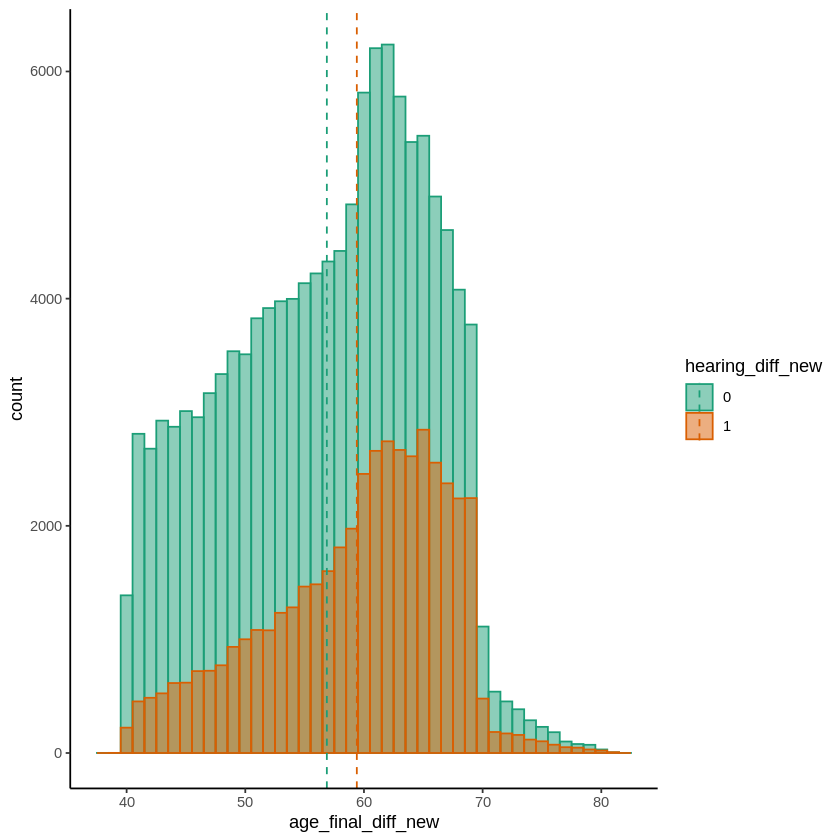

In [116]:
ggplot(f.2247_pheno, aes(x=age_final_diff_new, fill=hearing_diff_new, color=hearing_diff_new)) +
 geom_histogram(binwidth=1, alpha=0.5, position="identity")+
  scale_color_brewer(palette="Dark2")+
  scale_fill_brewer(palette="Dark2") +
  theme(legend.position="top") +
  geom_vline(data=mu3, aes(xintercept=grp.mean, color=hearing_diff_new),
             linetype="dashed") +
  theme_classic()

In [117]:
length(which((f.2247_pheno$hearing_diff_new=="0" & f.2247_pheno$age_final_diff <50)))
length(which((f.2247_pheno$hearing_diff_new=="1" & f.2247_pheno$age_final_diff <50)))

[1] 28684

[1] 6075

In [118]:
mu4 <- ddply(f.2247_pheno, "sex", summarise, grp.mean=mean(age_final_diff_new))
head(mu1)

,sex,grp.mean
,<fct>,<dbl>
1,1,58.31905
2,0,59.09568


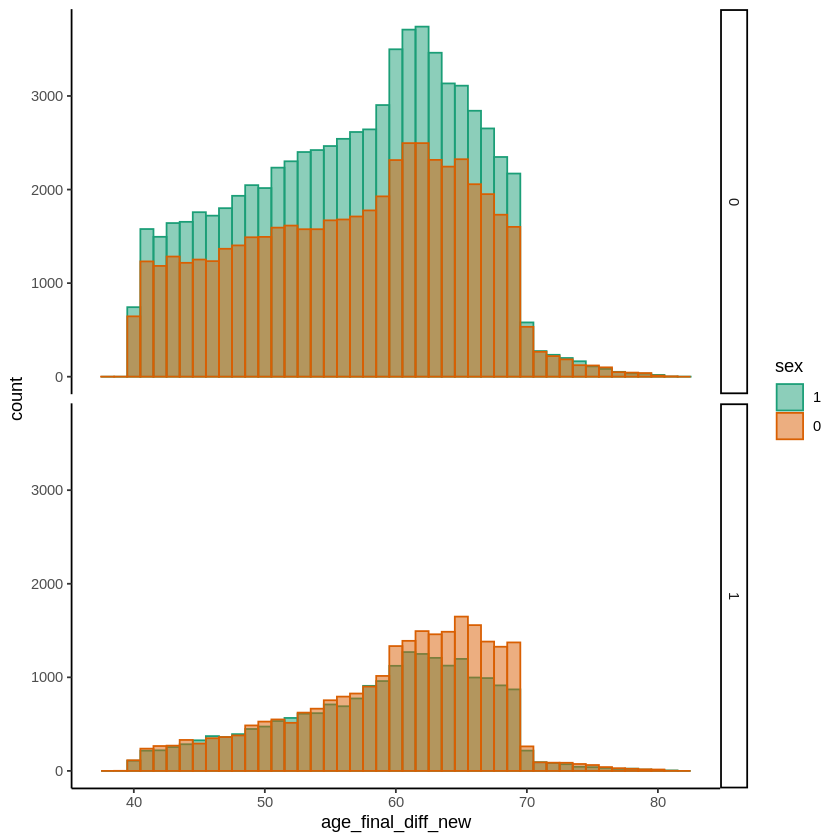

In [119]:
ggplot(f.2247_pheno, aes(x=age_final_diff_new, fill=sex, color=sex)) +
 geom_histogram(binwidth=1, alpha=0.5, position="identity")+
  scale_color_brewer(palette="Dark2")+
  scale_fill_brewer(palette="Dark2") +
  theme(legend.position="top") +
  theme_classic() +
  facet_grid(hearing_diff_new ~ .)

## Filter controls positive for f.3393 and/or f.2257

In [120]:
control_check_2247 <- df_3393_2247 %>%
    filter(hearing_diff_new==0) %>%
    select(FID, IID, age_final_diff_new, sex, hearing_diff_new, starts_with("f.2257"), starts_with("f.3393")) %>%
    mutate(remove_2257 = apply(select(.,starts_with("f.2257")), 1, function(x) length(which(x == "Yes")) > 0),
           remove_3393 = apply(select(.,starts_with("f.3393")), 1, function(x) length(which(x == "Yes")) > 0))
head(control_check_2247)

,FID,IID,age_final_diff_new,sex,hearing_diff_new,f.2257.0.0,f.2257.1.0,f.2257.2.0,f.2257.3.0,f.3393.0.0,f.3393.1.0,f.3393.2.0,f.3393.3.0,f.3393.0.0_recode,f.3393.1.0_recode,f.3393.2.0_recode,f.3393.3.0_recode,remove_2257,remove_3393
,<int>,<int>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<lgl>,<lgl>
1,1000035,1000035,63,0,0,Yes,NA,NA,NA,No,NA,NA,NA,0,NA,NA,NA,TRUE,FALSE
2,1000078,1000078,60,1,0,No,No,No,NA,NA,No,No,NA,NA,0,0,NA,FALSE,FALSE
3,1000081,1000081,67,0,0,No,NA,NA,NA,No,NA,NA,NA,0,NA,NA,NA,FALSE,FALSE
4,1000224,1000224,58,1,0,No,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,FALSE,FALSE
5,1000236,1000236,70,0,0,No,NA,No,NA,No,NA,No,NA,0,NA,0,NA,FALSE,FALSE
6,1000255,1000255,61,1,0,No,NA,No,NA,No,NA,No,NA,0,NA,0,NA,FALSE,FALSE


In [121]:
length(which(control_check_2247$remove_2257==TRUE)) #controls that replied yes to f.2257
length(which(control_check_2247$remove_3393==TRUE)) #controls that replied yes to f.3393
length(which(control_check_2247$remove_2257==TRUE & control_check_2247$remove_3393==TRUE)) # controls that replied yes to both
length(which(control_check_2247$remove_2257==TRUE | control_check_2247$remove_3393==TRUE)) # controls that replied yes to either

[1] 25368

[1] 3

[1] 1

[1] 25370

### Export file white-British

In [93]:
write.table(f.2247_pheno, '200828_UKBB_Hearing_difficulty_f2247', quote = FALSE, row.names = FALSE)

### Export file white expanded

In [93]:
write.table(f.2247_pheno, '120120_UKBB_Hearing_difficulty_f2247_expandedwhite', quote = FALSE, row.names = FALSE)

### Export file exome data

In [276]:
length(which(is.na(f.2247_pheno$hearing_diff_new)))

[1] 0

In [101]:
write.table(f.2247_pheno, 'phenotypes_exome_data/010421_UKBB_Hearing_difficulty_f2247_171970ind_exomes', quote = FALSE, row.names = FALSE)

## f.2257 Hearing difficulty/background noise (2257)
### step1: classify cases and controls

In [122]:
table(df.final.imp$f.2257.0.0)
dim(df.final.imp)


         Do not know                   No Prefer not to answer 
                3644               112346                  160 
                 Yes 
               66379 

[1] 182761   2271

In [123]:
# Recode function:
recode<-function(df,column_name){
  new_names<-c()
  for (i in column_name){
    new_column_name<-paste0(i,"_recode")
    new_names<-c(new_names,new_column_name)
    df[,new_column_name] <- revalue(df[,i], c("No"= 0, 
                                            "Yes" =1,
                                            "Prefer not to answer"= NA,
                                             "Do not know"=9))
  }
  return (list(df=df,new_column_names=new_names))
}

# columns needs to be recoded:
column_name<-c("f.2257.0.0","f.2257.1.0","f.2257.2.0","f.2257.3.0")

# get a new data.frame with recoded columns added:
df.final.imp<-recode(df=df.final.imp,column_name)$df

# get names of recoded columns:
new_column_names<-recode(df=df.final.imp,column_name)$new_column_names

# show recode summary:
for (i in new_column_names)
{cat(i,"summary:");print(table(df.final.imp[,i]));cat("\n")}

The following `from` values were not present in `x`: Prefer not to answer

The following `from` values were not present in `x`: Prefer not to answer



f.2257.0.0_recode summary:
     9      0      1 
  3644 112346  66379 

f.2257.1.0_recode summary:
   9    0    1 
 205 5243 4008 

f.2257.2.0_recode summary:
    9     0     1 
  541 13021 10463 

f.2257.3.0_recode summary:
  9   0   1 
 26 504 406 



In [124]:
dim(df.final.imp)

[1] 182761   2275

## f.2257 Get patterns for all possible answers

In [125]:
# Extract subset of data only with the recode columns of tinnitus
data_sub <- df.final.imp %>%
  select("IID",all_of(new_column_names)) 

# Function to extract all the available answers for 4 visits
# and put them in one string as "0000", "111", "991", etc

f2<-function(x){
  visit<-''
  for (i in 2:5){ # do not take the first column (i.e. IID)
    if (!is.na(x[i]))
    {visit<-paste0(visit,x[i])}
  }
  if(is.null(visit)){visit=NA}
  else{visit=visit}
  return (visit)
}

# Apply the above function and remove NAs
data_sub$visit<-apply(data_sub, 1, f2)

names(table(data_sub$visit))

[1] ""     "0"    "00"   "000"  "0000" "0001" "0009" "001"  "0010" "0011"
[11] "009"  "0090" "01"   "010"  "0100" "0101" "011"  "0110" "0111" "019" 
[21] "09"   "090"  "0900" "091"  "099"  "1"    "10"   "100"  "1000" "1001"
[31] "101"  "1011" "109"  "1099" "11"   "110"  "1100" "1101" "111"  "1110"
[41] "1111" "1119" "119"  "19"   "190"  "1900" "191"  "199"  "9"    "90"  
[51] "900"  "9000" "901"  "909"  "91"   "910"  "911"  "9110" "919"  "99"  
[61] "990"  "991"  "999"  "9999"

In [126]:
table(data_sub$visit)
all_pattern<-unique(data_sub$visit)


          0    00   000  0000  0001  0009   001  0010  0011   009  0090    01 
  375 94910 10470  2411    62     6     2   360     6     6    43     1  3034 
  010  0100  0101   011  0110  0111   019    09   090  0900   091   099     1 
  212     2     2   386     1     8    16   340    42     2    23     5 55989 
   10   100  1000  1001   101  1011   109  1099    11   110  1100  1101   111 
 1507   234     4     1   150     3    12     1  6583   142     2     1  1534 
 1110  1111  1119   119    19   190  1900   191   199     9    90   900  9000 
    3    45     1    25   121     6     2    21     3  3135   183    27     1 
  901   909    91   910   911  9110   919    99   990   991   999  9999 
    7     3   178     9    21     1     5    53     7     7     7     2 

## f.2257 Get all the consitent cases

In [127]:
all_no<-all_pattern[which(grepl("0",all_pattern) & !grepl("9",all_pattern) & !grepl("1",all_pattern))]
all_yes<-all_pattern[which(!grepl("0",all_pattern) & !grepl("9",all_pattern) & grepl("1",all_pattern))]
all_do_not_know<-all_pattern[which(!grepl("0",all_pattern) & grepl("9",all_pattern) & !grepl("1",all_pattern))]
table(data_sub[data_sub$visit%in%union(union(all_no,all_yes),all_do_not_know),"visit"])


    0    00   000  0000     1    11   111  1111     9    99   999  9999 
94910 10470  2411    62 55989  6583  1534    45  3135    53     7     2 

In [128]:
consistent_1<-c(all_no,all_yes,all_do_not_know)

# might be inconsistent cases:
do_not_know_no<-all_pattern[which(grepl("0",all_pattern) & grepl("9",all_pattern) & !grepl("1",all_pattern))]
table(data_sub[data_sub$visit%in%do_not_know_no,"visit"])


0009  009 0090   09  090 0900  099   90  900 9000  909  990 
   2   43    1  340   42    2    5  183   27    1    3    7 

In [129]:
do_not_know_yes<-all_pattern[which(!grepl("0",all_pattern) & grepl("9",all_pattern) & grepl("1",all_pattern))]
table(data_sub[data_sub$visit%in%do_not_know_yes,"visit"])


1119  119   19  191  199   91  911  919  991 
   1   25  121   21    3  178   21    5    7 

In [130]:
yes_no<-all_pattern[which(grepl("0",all_pattern) & !grepl("9",all_pattern) & grepl("1",all_pattern))]
table(data_sub[data_sub$visit%in%yes_no,"visit"])


0001  001 0010 0011   01  010 0100 0101  011 0110 0111   10  100 1000 1001  101 
   6  360    6    6 3034  212    2    2  386    1    8 1507  234    4    1  150 
1011  110 1100 1101 1110 
   3  142    2    1    3 

In [131]:
with_all_three<-all_pattern[which(grepl("0",all_pattern) & grepl("9",all_pattern) & grepl("1",all_pattern))]
table(data_sub[data_sub$visit%in%with_all_three,"visit"])


 019  091  109 1099  190 1900  901  910 9110 
  16   23   12    1    6    2    7    9    1 

In [132]:
might_inconsistent<-c(do_not_know_no,do_not_know_yes,yes_no,with_all_three)

## f.2257 Remove all the inconsistent

In [133]:
# get all the inconsistent cases:
exceptions<-c("91","911","9111","991","9991","0001","001","0011","01","011","0111", "0091", "091","0911","9001","901","9011")
inconsistent<-setdiff(might_inconsistent,exceptions)

cat("There are",length(which(is.empty(data_sub$visit))),"NAs, removed")

There are 375 NAs, removed

In [134]:
cat("There are",length(which(data_sub$visit%in%inconsistent)),"inconsistent cases, removed")

There are 3149 inconsistent cases, removed

In [135]:
# removed those NAs, consistent for do not know - 9 and inconsistent cases: 
IID_hearing_noise<-data_sub %>%
  filter(!is.empty(visit)) %>%
  filter((!visit%in%inconsistent)) %>%
  filter((!visit%in%all_do_not_know)) %>%
  select(IID)

dim(IID_hearing_noise)

[1] 176040      1

In [136]:
IID_hearing_noise<-IID_hearing_noise[,1]
cat("After removing all the NAs and inconsistent cases, there are",length(IID_hearing_noise),"cases left")

After removing all the NAs and inconsistent cases, there are 176040 cases left

In [137]:
# get the dataset after cleansing: 
df.hearing.noise<-df.final.imp %>%
  filter(IID%in%IID_hearing_noise)

dim(df.hearing.noise)

[1] 176040   2275

## f.2257 Step 1 classify cases and controls

In [138]:
hearing_noise <- df.hearing.noise %>% 
  select(IID,FID,f.22001.0.0, f.21003.0.0,f.21003.1.0,f.21003.2.0,f.21003.3.0,f.2257.0.0_recode,f.2257.1.0_recode,f.2257.2.0_recode,f.2257.3.0_recode)
head(hearing_noise)

,IID,FID,f.22001.0.0,f.21003.0.0,f.21003.1.0,f.21003.2.0,f.21003.3.0,f.2257.0.0_recode,f.2257.1.0_recode,f.2257.2.0_recode,f.2257.3.0_recode
,<int>,<int>,<fct>,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<fct>
1,1000019,1000019,Female,47,NA,NA,NA,1,NA,NA,NA
2,1000035,1000035,Male,63,NA,NA,NA,1,NA,NA,NA
3,1000078,1000078,Female,52,57,60,NA,0,0,0,NA
4,1000081,1000081,Male,67,NA,NA,NA,0,NA,NA,NA
5,1000198,1000198,Female,41,NA,NA,NA,1,NA,NA,NA
6,1000210,1000210,Male,66,NA,NA,NA,0,NA,NA,NA


In [139]:
data_sub <- select(hearing_noise,starts_with("f.2257"))

# Function to define cases
f<-function(x){
  visit<-c()
  for (i in 1:4){
    if (!is.na(x[i]))
    {visit<-c(visit,x[i])}
  }
  if ("1" %in% visit){result= TRUE}
  else{result=FALSE}
  return (result)
}

# Apply the above function
hearing_noise$cases<-apply(data_sub, 1, f)
head(hearing_noise,10)

,IID,FID,f.22001.0.0,f.21003.0.0,f.21003.1.0,f.21003.2.0,f.21003.3.0,f.2257.0.0_recode,f.2257.1.0_recode,f.2257.2.0_recode,f.2257.3.0_recode,cases
,<int>,<int>,<fct>,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<lgl>
1,1000019,1000019,Female,47,NA,NA,NA,1,NA,NA,NA,TRUE
2,1000035,1000035,Male,63,NA,NA,NA,1,NA,NA,NA,TRUE
3,1000078,1000078,Female,52,57,60,NA,0,0,0,NA,FALSE
4,1000081,1000081,Male,67,NA,NA,NA,0,NA,NA,NA,FALSE
5,1000198,1000198,Female,41,NA,NA,NA,1,NA,NA,NA,TRUE
6,1000210,1000210,Male,66,NA,NA,NA,0,NA,NA,NA,FALSE
7,1000224,1000224,Female,58,NA,NA,NA,0,NA,NA,NA,FALSE
8,1000236,1000236,Male,61,NA,70,NA,0,NA,0,NA,FALSE
9,1000255,1000255,Female,51,NA,61,NA,0,NA,0,NA,FALSE


In [140]:
hearing_noise_cases <- hearing_noise %>% 
  filter(cases == TRUE)
head(hearing_noise_cases)
cat(dim(hearing_noise_cases)[1], "individuals are cases for f.2257")

,IID,FID,f.22001.0.0,f.21003.0.0,f.21003.1.0,f.21003.2.0,f.21003.3.0,f.2257.0.0_recode,f.2257.1.0_recode,f.2257.2.0_recode,f.2257.3.0_recode,cases
,<int>,<int>,<fct>,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<lgl>
1,1000019,1000019,Female,47,NA,NA,NA,1,NA,NA,NA,TRUE
2,1000035,1000035,Male,63,NA,NA,NA,1,NA,NA,NA,TRUE
3,1000198,1000198,Female,41,NA,NA,NA,1,NA,NA,NA,TRUE
4,1000304,1000304,Female,56,NA,NA,NA,1,NA,NA,NA,TRUE
5,1000396,1000396,Male,48,NA,NA,NA,1,NA,NA,NA,TRUE
6,1000494,1000494,Male,61,NA,NA,NA,1,NA,NA,NA,TRUE


68187 individuals are cases for f.2257

In [141]:
hearing_noise_controls <- hearing_noise %>% 
  filter(cases == FALSE)
head(hearing_noise_controls)
cat(dim(hearing_noise_controls)[1], "individuals are controls for f.2257")

,IID,FID,f.22001.0.0,f.21003.0.0,f.21003.1.0,f.21003.2.0,f.21003.3.0,f.2257.0.0_recode,f.2257.1.0_recode,f.2257.2.0_recode,f.2257.3.0_recode,cases
,<int>,<int>,<fct>,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<lgl>
1,1000078,1000078,Female,52,57,60,NA,0,0,0,NA,FALSE
2,1000081,1000081,Male,67,NA,NA,NA,0,NA,NA,NA,FALSE
3,1000210,1000210,Male,66,NA,NA,NA,0,NA,NA,NA,FALSE
4,1000224,1000224,Female,58,NA,NA,NA,0,NA,NA,NA,FALSE
5,1000236,1000236,Male,61,NA,70,NA,0,NA,0,NA,FALSE
6,1000255,1000255,Female,51,NA,61,NA,0,NA,0,NA,FALSE


107853 individuals are controls for f.2257

In [142]:
dim(hearing_noise)[1]-nrow(hearing_noise_cases) - nrow(hearing_noise_controls )

[1] 0

## f.2257 Recode cases=1 and controls=0

In [143]:
hearing_noise$hearing_noise_cat <- as.integer(as.logical(hearing_noise$cases))
head(hearing_noise, 10)
# Get the number of NAs
length(which(is.na(hearing_noise$hearing_noise_cat)))

,IID,FID,f.22001.0.0,f.21003.0.0,f.21003.1.0,f.21003.2.0,f.21003.3.0,f.2257.0.0_recode,f.2257.1.0_recode,f.2257.2.0_recode,f.2257.3.0_recode,cases,hearing_noise_cat
,<int>,<int>,<fct>,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<lgl>,<int>
1,1000019,1000019,Female,47,NA,NA,NA,1,NA,NA,NA,TRUE,1
2,1000035,1000035,Male,63,NA,NA,NA,1,NA,NA,NA,TRUE,1
3,1000078,1000078,Female,52,57,60,NA,0,0,0,NA,FALSE,0
4,1000081,1000081,Male,67,NA,NA,NA,0,NA,NA,NA,FALSE,0
5,1000198,1000198,Female,41,NA,NA,NA,1,NA,NA,NA,TRUE,1
6,1000210,1000210,Male,66,NA,NA,NA,0,NA,NA,NA,FALSE,0
7,1000224,1000224,Female,58,NA,NA,NA,0,NA,NA,NA,FALSE,0
8,1000236,1000236,Male,61,NA,70,NA,0,NA,0,NA,FALSE,0
9,1000255,1000255,Female,51,NA,61,NA,0,NA,0,NA,FALSE,0


[1] 0

## f.2257 Step 2: get the ages for hearing difficulty with background noise

In [144]:
# Get the subset data of cases
noise_age_cases = hearing_noise %>% 
  filter(hearing_noise_cat=="1")  %>%
  select(IID, f.2257.0.0_recode, f.2257.1.0_recode, f.2257.2.0_recode, f.2257.3.0_recode, f.21003.0.0, f.21003.1.0, f.21003.2.0, f.21003.3.0)
head(noise_age_cases,12)

,IID,f.2257.0.0_recode,f.2257.1.0_recode,f.2257.2.0_recode,f.2257.3.0_recode,f.21003.0.0,f.21003.1.0,f.21003.2.0,f.21003.3.0
,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>
1,1000019,1,NA,NA,NA,47,NA,NA,NA
2,1000035,1,NA,NA,NA,63,NA,NA,NA
3,1000198,1,NA,NA,NA,41,NA,NA,NA
4,1000304,1,NA,NA,NA,56,NA,NA,NA
5,1000396,1,NA,NA,NA,48,NA,NA,NA
6,1000494,1,NA,NA,NA,61,NA,NA,NA
7,1000551,1,NA,NA,NA,68,NA,NA,NA
8,1000817,1,NA,NA,NA,58,NA,NA,NA
9,1000875,1,NA,NA,NA,59,NA,NA,NA


In [145]:
# Get the # of column where first replied Yes:
noise_age_cases$visit_idx = apply(noise_age_cases, 1, function(x) unlist(which(x == '1')))
head(noise_age_cases)

,IID,f.2257.0.0_recode,f.2257.1.0_recode,f.2257.2.0_recode,f.2257.3.0_recode,f.21003.0.0,f.21003.1.0,f.21003.2.0,f.21003.3.0,visit_idx
,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<list>
1,1000019,1,NA,NA,NA,47,NA,NA,NA,2
2,1000035,1,NA,NA,NA,63,NA,NA,NA,2
3,1000198,1,NA,NA,NA,41,NA,NA,NA,2
4,1000304,1,NA,NA,NA,56,NA,NA,NA,2
5,1000396,1,NA,NA,NA,48,NA,NA,NA,2
6,1000494,1,NA,NA,NA,61,NA,NA,NA,2


In [146]:
# Define offset:
# offset: refers to the # of columns between the first age column (i.e.f.21003.0.0) and the first recode column (i.e.f.2257.0.0_recode)
offset = which(colnames(noise_age_cases) == 'f.21003.0.0') - which(colnames(noise_age_cases) == 'f.2257.0.0_recode')

# Define the function to extract the first time they said yes for cases 
f=get_age_func <- function(x) {
  visit_index=x[which(colnames(noise_age_cases)=="visit_idx")]
  index=min(unlist(visit_index))+offset
  age=x[index]
  final_age=unlist(age)
  if(is.null(final_age))
  {final_age<-NA}
  return(final_age)
}

# Get the final age for cases
noise_age_cases$age_final_noise = apply(noise_age_cases, 1, f)

# Show first 6 rows
head(noise_age_cases)
summary(noise_age_cases$age_final_noise)

,IID,f.2257.0.0_recode,f.2257.1.0_recode,f.2257.2.0_recode,f.2257.3.0_recode,f.21003.0.0,f.21003.1.0,f.21003.2.0,f.21003.3.0,visit_idx,age_final_noise
,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<list>,<int>
1,1000019,1,NA,NA,NA,47,NA,NA,NA,2,47
2,1000035,1,NA,NA,NA,63,NA,NA,NA,2,63
3,1000198,1,NA,NA,NA,41,NA,NA,NA,2,41
4,1000304,1,NA,NA,NA,56,NA,NA,NA,2,56
5,1000396,1,NA,NA,NA,48,NA,NA,NA,2,48
6,1000494,1,NA,NA,NA,61,NA,NA,NA,2,61


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  40.00   53.00   60.00   58.43   65.00   82.00 

In [147]:
### Extract age for Control (2257)
noise_age_control <- hearing_noise %>% 
  filter(hearing_noise_cat == "0") %>%
  select(IID, f.2257.0.0_recode, f.2257.1.0_recode, f.2257.2.0_recode, f.2257.3.0_recode, f.21003.0.0, f.21003.1.0, f.21003.2.0, f.21003.3.0)
head(noise_age_control)

,IID,f.2257.0.0_recode,f.2257.1.0_recode,f.2257.2.0_recode,f.2257.3.0_recode,f.21003.0.0,f.21003.1.0,f.21003.2.0,f.21003.3.0
,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>
1,1000078,0,0,0,NA,52,57,60,NA
2,1000081,0,NA,NA,NA,67,NA,NA,NA
3,1000210,0,NA,NA,NA,66,NA,NA,NA
4,1000224,0,NA,NA,NA,58,NA,NA,NA
5,1000236,0,NA,0,NA,61,NA,70,NA
6,1000255,0,NA,0,NA,51,NA,61,NA


In [148]:
# Get the # of column where last replied No:
noise_age_control$visit_idx = apply(noise_age_control, 1, function(x) unlist(which(x == '0')))

# Define offset:
# offset: refers to the # of columns between the first age column (i.e.f.21003.0.0) and the first recode column (i.e.f.2257.0.0_recode)
offset = which(colnames(noise_age_control) == 'f.21003.0.0') - which(colnames(noise_age_control) == 'f.2257.0.0_recode')

# Define the function to extract the last time they said no for control

f=get_age_func <- function(x) {
  visit_index=x[which(colnames(noise_age_control)=="visit_idx")]
  index=max(unlist(visit_index))+offset
  age=x[index]
  age=unlist(age)
  return(age)
}

# Get the final age for controls
noise_age_control$age_final_noise = apply(noise_age_control, 1, f)

# Show first 6 rows
head(noise_age_control)
summary(noise_age_control$age_final_noise)

,IID,f.2257.0.0_recode,f.2257.1.0_recode,f.2257.2.0_recode,f.2257.3.0_recode,f.21003.0.0,f.21003.1.0,f.21003.2.0,f.21003.3.0,visit_idx,age_final_noise
,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<list>,<int>
1,1000078,0,0,0,NA,52,57,60,NA,"2, 3, 4",60
2,1000081,0,NA,NA,NA,67,NA,NA,NA,2,67
3,1000210,0,NA,NA,NA,66,NA,NA,NA,2,66
4,1000224,0,NA,NA,NA,58,NA,NA,NA,2,58
5,1000236,0,NA,0,NA,61,NA,70,NA,"2, 4",70
6,1000255,0,NA,0,NA,51,NA,61,NA,"2, 4",61


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   38.0    50.0    58.0    56.8    63.0    82.0 

In [149]:
# Merge age_cases and age_controls
hearing_noise_age <- rbind(noise_age_cases, noise_age_control) 
dim(hearing_noise_age)
head(hearing_noise_age)

[1] 176040     11

,IID,f.2257.0.0_recode,f.2257.1.0_recode,f.2257.2.0_recode,f.2257.3.0_recode,f.21003.0.0,f.21003.1.0,f.21003.2.0,f.21003.3.0,visit_idx,age_final_noise
,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<list>,<int>
1,1000019,1,NA,NA,NA,47,NA,NA,NA,2,47
2,1000035,1,NA,NA,NA,63,NA,NA,NA,2,63
3,1000198,1,NA,NA,NA,41,NA,NA,NA,2,41
4,1000304,1,NA,NA,NA,56,NA,NA,NA,2,56
5,1000396,1,NA,NA,NA,48,NA,NA,NA,2,48
6,1000494,1,NA,NA,NA,61,NA,NA,NA,2,61


In [150]:
hearing_noise_age = merge(x = hearing_noise ,y = hearing_noise_age [,c("IID","age_final_noise")],by="IID", all.x=TRUE)
head(hearing_noise_age)
dim(hearing_noise_age)

,IID,FID,f.22001.0.0,f.21003.0.0,f.21003.1.0,f.21003.2.0,f.21003.3.0,f.2257.0.0_recode,f.2257.1.0_recode,f.2257.2.0_recode,f.2257.3.0_recode,cases,hearing_noise_cat,age_final_noise
,<int>,<int>,<fct>,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<lgl>,<int>,<int>
1,1000019,1000019,Female,47,NA,NA,NA,1,NA,NA,NA,TRUE,1,47
2,1000035,1000035,Male,63,NA,NA,NA,1,NA,NA,NA,TRUE,1,63
3,1000078,1000078,Female,52,57,60,NA,0,0,0,NA,FALSE,0,60
4,1000081,1000081,Male,67,NA,NA,NA,0,NA,NA,NA,FALSE,0,67
5,1000198,1000198,Female,41,NA,NA,NA,1,NA,NA,NA,TRUE,1,41
6,1000210,1000210,Male,66,NA,NA,NA,0,NA,NA,NA,FALSE,0,66


[1] 176040     14

## Merge f.3393, f.2247 and f.2257

In [151]:
#Merge with complete database keep the all the rows from original db
df_3393_2247_2257 = merge(x = df_3393_2247, y = hearing_noise_age [,c("IID","hearing_noise_cat","age_final_noise")],by="IID", all.x=TRUE)
dim(df_3393_2247_2257)
head(df_3393_2247_2257)

[1] 182761   2276

,IID,FID,ignore1,ignore2,ignore3,ignore4,f.31.0.0,f.34.0.0,f.53.0.0,f.53.1.0,⋯,f.3393.3.0_recode,hearing_aid_cat_new,age_final_aid,hearing_diff_cat,age_final_diff,hearing_diff_cat_new,hearing_diff_new,age_final_diff_new,hearing_noise_cat,age_final_noise
,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<int>,<fct>,<fct>,⋯,<fct>,<fct>,<dbl>,<int>,<int>,<fct>,<fct>,<dbl>,<int>,<int>
1,1000019,1000019,0,0,2,-9,Female,1960,2008-01-24,NA,⋯,NA,0,47,1,47,1,1,47,1,47
2,1000035,1000035,0,0,1,-9,Male,1944,2007-11-08,NA,⋯,NA,0,63,0,63,0,0,63,1,63
3,1000078,1000078,0,0,2,-9,Female,1955,2007-08-20,2012-11-01,⋯,NA,0,60,0,60,0,0,60,0,60
4,1000081,1000081,0,0,1,-9,Male,1942,2009-12-03,NA,⋯,NA,0,67,0,67,0,0,67,0,67
5,1000198,1000198,0,0,2,-9,Female,1967,2009-03-27,NA,⋯,NA,0,41,1,41,1,1,41,1,41
6,1000210,1000210,0,0,1,-9,Male,1941,2008-02-11,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,0,66


## Export file for hearing with background noise f.2257

In [152]:
f.2257_pheno <- df_3393_2247_2257 %>%
    filter(!(is.na(hearing_noise_cat))) %>%
    select(FID, IID, age_final_noise, sex, hearing_noise_cat) 
    #mutate(hearing_noise_cat=recode_factor(hearing_noise_cat, `1`="case",`0`="control"),sex=recode_factor(sex, `1`="male", `0`="female" ))
head(f.2257_pheno)
dim(f.2257_pheno)

,FID,IID,age_final_noise,sex,hearing_noise_cat
,<int>,<int>,<int>,<fct>,<int>
1,1000019,1000019,47,1,1
2,1000035,1000035,63,0,1
3,1000078,1000078,60,1,0
4,1000081,1000081,67,0,0
5,1000198,1000198,41,1,1
6,1000210,1000210,66,0,0


[1] 176040      5

## Histogram for age of cases and controls

In [153]:
mu5 <- ddply(f.2257_pheno, "hearing_noise_cat", summarise, grp.mean=mean(age_final_noise))
head(mu)

,hearing_aid_cat_new,grp.mean
,<dbl>,<dbl>
1,0,58.41244
2,1,63.91095


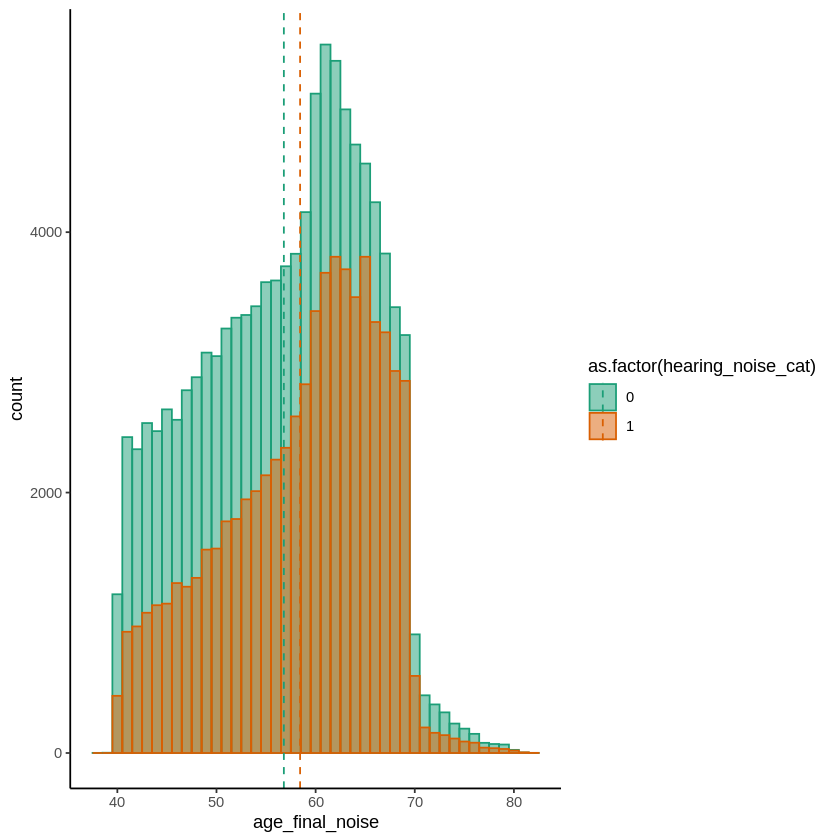

In [154]:
ggplot(f.2257_pheno, aes(x=age_final_noise, fill=as.factor(hearing_noise_cat), color=as.factor(hearing_noise_cat))) +
 geom_histogram(binwidth=1, alpha=0.5, position="identity")+
  scale_color_brewer(palette="Dark2")+
  scale_fill_brewer(palette="Dark2") +
  theme(legend.position="top") +
  geom_vline(data=mu5, aes(xintercept=grp.mean, color=as.factor(hearing_noise_cat)),
             linetype="dashed") +
  theme_classic()

In [155]:
length(which((f.2257_pheno$hearing_noise_cat=="0" & f.2257_pheno$age_final_noise <50)))

[1] 24932

In [156]:
length(which((f.2257_pheno$hearing_noise_cat=="1" & f.2257_pheno$age_final_noise <50)))

[1] 11190

In [157]:
mu6 <- ddply(f.2257_pheno, "sex", summarise, grp.mean=mean(age_final_noise))
head(mu6)

,sex,grp.mean
,<fct>,<dbl>
1,1,57.23873
2,0,57.66560


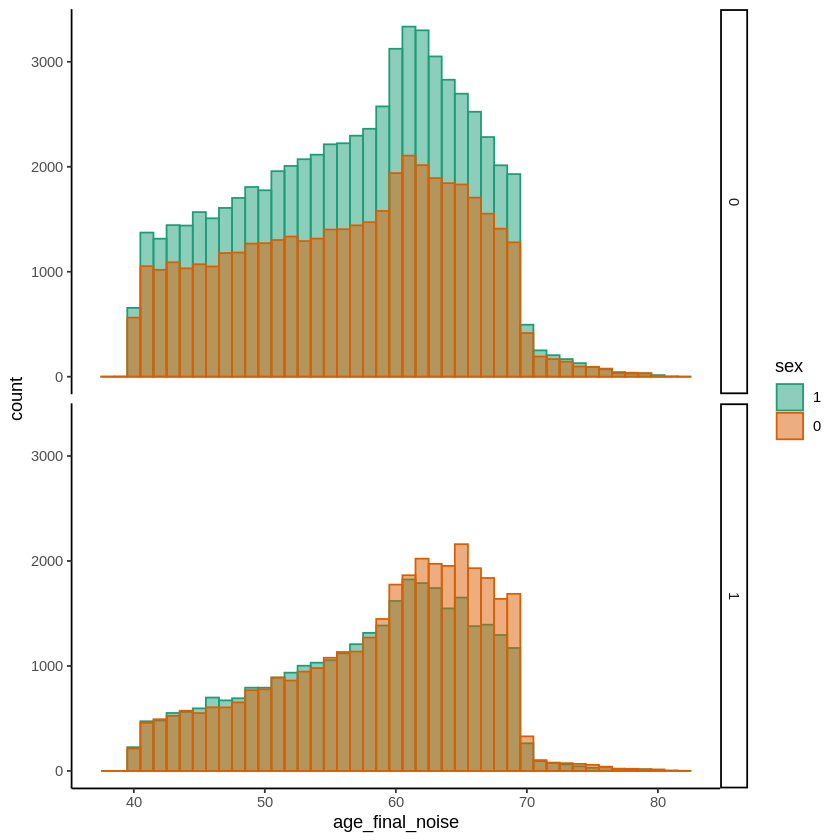

In [158]:
ggplot(f.2257_pheno, aes(x=age_final_noise, fill=sex, color=sex)) +
 geom_histogram(binwidth=1, alpha=0.5, position="identity")+
  scale_color_brewer(palette="Dark2")+
  scale_fill_brewer(palette="Dark2") +
  theme(legend.position="top") +
  theme_classic() +
  facet_grid(hearing_noise_cat ~ .)

## Find out controls positive for f.2247 & f.3393

In [159]:
control_check_2257 <- df_3393_2247_2257 %>%
    filter(hearing_noise_cat==0) %>%
    select(FID, IID, age_final_noise, sex, hearing_noise_cat, starts_with("f.2247"), starts_with("f.3393")) %>%
    mutate(remove_2247 = apply(select(.,starts_with("f.2247")), 1, function(x) length(which(x == "Yes")) > 0),
           remove_3393 = apply(select(.,starts_with("f.3393")), 1, function(x) length(which(x == "Yes")) > 0))
head(control_check_2257)

,FID,IID,age_final_noise,sex,hearing_noise_cat,f.2247.0.0,f.2247.1.0,f.2247.2.0,f.2247.3.0,f.3393.0.0,f.3393.1.0,f.3393.2.0,f.3393.3.0,f.3393.0.0_recode,f.3393.1.0_recode,f.3393.2.0_recode,f.3393.3.0_recode,remove_2247,remove_3393
,<int>,<int>,<int>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<lgl>,<lgl>
1,1000078,1000078,60,1,0,No,No,No,NA,NA,No,No,NA,NA,0,0,NA,FALSE,FALSE
2,1000081,1000081,67,0,0,No,NA,NA,NA,No,NA,NA,NA,0,NA,NA,NA,FALSE,FALSE
3,1000210,1000210,66,0,0,Do not know,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,FALSE,FALSE
4,1000224,1000224,58,1,0,No,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,FALSE,FALSE
5,1000236,1000236,70,0,0,No,NA,No,NA,No,NA,No,NA,0,NA,0,NA,FALSE,FALSE
6,1000255,1000255,61,1,0,No,NA,No,NA,No,NA,No,NA,0,NA,0,NA,FALSE,FALSE


In [160]:
length(which(control_check_2257$remove_2247==TRUE)) #controls that replied yes to f.2247
length(which(control_check_2257$remove_3393==TRUE)) #controls that replied yes to f.3393
length(which(control_check_2257$remove_2247==TRUE & control_check_2257$remove_3393==TRUE)) # controls that replied yes to both
length(which(control_check_2257$remove_2247==TRUE | control_check_2257$remove_3393==TRUE)) # controls that replied yes to either

[1] 7040

[1] 239

[1] 209

[1] 7070

### Export files white-British

In [133]:
write.table(f.2257_pheno, '200828_UKBB_Hearing_background_noise_f2257', quote = FALSE, row.names = FALSE)

### Export files white expanded

In [133]:
write.table(f.2257_pheno, '120120_UKBB_Hearing_background_noise_f2257_expandedwhite', quote = FALSE, row.names = FALSE)

### Export files exome data

In [142]:
write.table(f.2257_pheno, 'phenotypes_exome_data/010421_UKBB_Hearing_background_noise_f2257_175531ind_exomes', quote = FALSE, row.names = FALSE)

## Combined phenotype f.2247 and f.2257

In [161]:
hybrid_inconsistent <- df_3393_2247_2257 %>%
 filter(hearing_noise_cat != hearing_diff_new)
head(hybrid_inconsistent)
cat ("There are ",nrow(hybrid_inconsistent),"individuals inconsistent for f.2247 and f.2257")
dim(df_3393_2247_2257)

,IID,FID,ignore1,ignore2,ignore3,ignore4,f.31.0.0,f.34.0.0,f.53.0.0,f.53.1.0,⋯,f.3393.3.0_recode,hearing_aid_cat_new,age_final_aid,hearing_diff_cat,age_final_diff,hearing_diff_cat_new,hearing_diff_new,age_final_diff_new,hearing_noise_cat,age_final_noise
,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<int>,<fct>,<fct>,⋯,<fct>,<fct>,<dbl>,<int>,<int>,<fct>,<fct>,<dbl>,<int>,<int>
1,1000035,1000035,0,0,1,-9,Male,1944,2007-11-08,NA,⋯,NA,0,63,0,63,0,0,63,1,63
2,1000304,1000304,0,0,2,-9,Female,1951,2008-02-15,NA,⋯,NA,0,56,0,56,0,0,56,1,56
3,1000817,1000817,0,0,1,-9,Male,1950,2009-04-18,NA,⋯,NA,0,58,0,58,0,0,58,1,58
4,1000988,1000988,0,0,2,-9,Female,1942,2008-04-10,NA,⋯,NA,0,65,0,65,0,0,65,1,65
5,1001080,1001080,0,0,2,-9,Female,1947,2010-04-30,NA,⋯,NA,0,62,0,62,0,0,62,1,62
6,1001316,1001316,0,0,1,-9,Male,1964,2010-04-08,NA,⋯,NA,0,51,1,51,1,1,51,0,51


There are  30702 individuals inconsistent for f.2247 and f.2257

[1] 182761   2276

In [178]:
length(which(!is.na(df_3393_2247_2257$hearing_noise_cat) & !is.na(df_3393_2247_2257$hearing_diff_new)))

[1] 167947

In [163]:
length(which(is.na(df_3393_2247_2257$hearing_noise_cat) | is.na(df_3393_2247_2257$hearing_diff_new))) 

[1] 14814

In [168]:
hybrid_consistent <- df_3393_2247_2257 %>%
 filter(hearing_noise_cat == hearing_diff_new)
head(hybrid_consistent)
cat ("There are ",nrow(hybrid_consistent),"individuals consistent for f.2247 and f.2257")

,IID,FID,ignore1,ignore2,ignore3,ignore4,f.31.0.0,f.34.0.0,f.53.0.0,f.53.1.0,⋯,f.3393.3.0_recode,hearing_aid_cat_new,age_final_aid,hearing_diff_cat,age_final_diff,hearing_diff_cat_new,hearing_diff_new,age_final_diff_new,hearing_noise_cat,age_final_noise
,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<int>,<fct>,<fct>,⋯,<fct>,<fct>,<dbl>,<int>,<int>,<fct>,<fct>,<dbl>,<int>,<int>
1,1000019,1000019,0,0,2,-9,Female,1960,2008-01-24,NA,⋯,NA,0,47,1,47,1,1,47,1,47
2,1000078,1000078,0,0,2,-9,Female,1955,2007-08-20,2012-11-01,⋯,NA,0,60,0,60,0,0,60,0,60
3,1000081,1000081,0,0,1,-9,Male,1942,2009-12-03,NA,⋯,NA,0,67,0,67,0,0,67,0,67
4,1000198,1000198,0,0,2,-9,Female,1967,2009-03-27,NA,⋯,NA,0,41,1,41,1,1,41,1,41
5,1000224,1000224,0,0,2,-9,Female,1951,2009-05-01,NA,⋯,NA,NA,NA,0,58,0,0,58,0,58
6,1000236,1000236,0,0,1,-9,Male,1948,2010-01-30,NA,⋯,NA,0,70,0,70,0,0,70,0,70


There are  137245 individuals consistent for f.2247 and f.2257

In [169]:
age_consistency <- hybrid_consistent %>%
    select(IID, age_final_diff, age_final_noise)
head(age_consistency)

,IID,age_final_diff,age_final_noise
,<int>,<int>,<int>
1,1000019,47,47
2,1000078,60,60
3,1000081,67,67
4,1000198,41,41
5,1000224,58,58
6,1000236,70,70


In [170]:
# There are inconsistencies for the age between hearing difficulty and background noise
all(age_consistency$age_final_diff == age_consistency$age_final_noise)

[1] FALSE

In [171]:
age_inconsistency <- hybrid_consistent %>%
    filter(age_final_diff != age_final_noise)
head(age_inconsistency)
cat ("There are",nrow(age_inconsistency), "individuals with inconsistent ages for hearing difficulty and background noise")

,IID,FID,ignore1,ignore2,ignore3,ignore4,f.31.0.0,f.34.0.0,f.53.0.0,f.53.1.0,⋯,f.3393.3.0_recode,hearing_aid_cat_new,age_final_aid,hearing_diff_cat,age_final_diff,hearing_diff_cat_new,hearing_diff_new,age_final_diff_new,hearing_noise_cat,age_final_noise
,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<int>,<fct>,<fct>,⋯,<fct>,<fct>,<dbl>,<int>,<int>,<fct>,<fct>,<dbl>,<int>,<int>
1,1006407,1006407,0,0,2,-9,Female,1949,2008-09-30,NA,⋯,NA,0,65,1,59,1,1,59,1,65
2,1006513,1006513,0,0,2,-9,Female,1955,2010-02-23,NA,⋯,NA,1,59,1,59,1,1,59,1,54
3,1012730,1012730,0,0,1,-9,Male,1947,2010-05-26,NA,⋯,0,0,73,1,70,1,1,70,1,63
4,1015865,1015865,0,0,2,-9,Female,1948,2010-04-27,NA,⋯,NA,0,71,1,71,1,1,71,1,62
5,1016086,1016086,0,0,1,-9,Male,1948,2008-08-20,NA,⋯,NA,0,70,1,60,1,1,60,1,70
6,1017495,1017495,0,0,1,-9,Male,1957,2008-08-04,NA,⋯,NA,0,58,1,58,1,1,58,1,51


There are 1918 individuals with inconsistent ages for hearing difficulty and background noise

In [179]:
age_inconsistency_cases <- hybrid_consistent %>%
    filter(hearing_noise_cat == 1 &  hearing_diff_new ==1) %>%
    filter(age_final_diff != age_final_noise) %>%
    select(FID, IID, sex, hearing_diff_new, hearing_noise_cat, age_final_diff, age_final_noise)
head(age_inconsistency_cases)
cat ("There are",nrow(age_inconsistency_cases), "cases with inconsistent ages for hearing difficulty and background noise")

,FID,IID,sex,hearing_diff_new,hearing_noise_cat,age_final_diff,age_final_noise
,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>
1,1006407,1006407,1,1,1,59,65
2,1006513,1006513,1,1,1,59,54
3,1012730,1012730,0,1,1,70,63
4,1015865,1015865,1,1,1,71,62
5,1016086,1016086,0,1,1,60,70
6,1017495,1017495,0,1,1,58,51


There are 1916 cases with inconsistent ages for hearing difficulty and background noise

In [180]:
age_inconsistency_controls <- hybrid_consistent %>%
    filter(hearing_noise_cat == 0 &  hearing_diff_new == 0) %>%
    filter(age_final_diff != age_final_noise) %>%
    select(FID, IID, sex, hearing_diff_new, hearing_noise_cat, age_final_diff, age_final_noise)
head(age_inconsistency_controls)
cat ("There are",nrow(age_inconsistency_controls), "controls with inconsistent ages for hearing difficulty and background noise")

,FID,IID,sex,hearing_diff_new,hearing_noise_cat,age_final_diff,age_final_noise
,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>
1,1740024,1740024,0,0,0,41,46
2,5668953,5668953,1,0,0,74,69


There are 2 controls with inconsistent ages for hearing difficulty and background noise

In [181]:
#get the minimum age for 2247 and 2257 for cases
age_inconsistency_cases <- transform(age_inconsistency_cases, age_diff_noise = pmin(age_final_noise, age_final_diff))
head(age_inconsistency_cases)

,FID,IID,sex,hearing_diff_new,hearing_noise_cat,age_final_diff,age_final_noise,age_diff_noise
,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>
1,1006407,1006407,1,1,1,59,65,59
2,1006513,1006513,1,1,1,59,54,54
3,1012730,1012730,0,1,1,70,63,63
4,1015865,1015865,1,1,1,71,62,62
5,1016086,1016086,0,1,1,60,70,60
6,1017495,1017495,0,1,1,58,51,51


In [182]:
#get the maximun age for 2247 and 2257 for controls
age_inconsistency_controls <- transform(age_inconsistency_controls, age_diff_noise = pmax(age_final_noise, age_final_diff))
head(age_inconsistency_controls,10)

,FID,IID,sex,hearing_diff_new,hearing_noise_cat,age_final_diff,age_final_noise,age_diff_noise
,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>
1,1740024,1740024,0,0,0,41,46,46
2,5668953,5668953,1,0,0,74,69,74


In [183]:
age_solved <- rbind(age_inconsistency_cases, age_inconsistency_controls)
nrow(age_solved)
head(age_solved)

[1] 1918

,FID,IID,sex,hearing_diff_new,hearing_noise_cat,age_final_diff,age_final_noise,age_diff_noise
,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>
1,1006407,1006407,1,1,1,59,65,59
2,1006513,1006513,1,1,1,59,54,54
3,1012730,1012730,0,1,1,70,63,63
4,1015865,1015865,1,1,1,71,62,62
5,1016086,1016086,0,1,1,60,70,60
6,1017495,1017495,0,1,1,58,51,51


In [184]:
hybrid_age_consistent <- hybrid_consistent  %>%
    filter(age_final_diff == age_final_noise) %>%
    select(FID, IID, sex, hearing_diff_new, hearing_noise_cat, age_final_diff, age_final_noise) %>%
    mutate(age_diff_noise = age_final_diff) 
head(hybrid_age_consistent)
cat ("There are ",nrow(hybrid_age_consistent),"individuals consistent for age and phenotype for f.2247 and f.2257")

,FID,IID,sex,hearing_diff_new,hearing_noise_cat,age_final_diff,age_final_noise,age_diff_noise
,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>
1,1000019,1000019,1,1,1,47,47,47
2,1000078,1000078,1,0,0,60,60,60
3,1000081,1000081,0,0,0,67,67,67
4,1000198,1000198,1,1,1,41,41,41
5,1000224,1000224,1,0,0,58,58,58
6,1000236,1000236,0,0,0,70,70,70


There are  135327 individuals consistent for age and phenotype for f.2247 and f.2257

In [185]:
f2247_f2257_pheno <- rbind (hybrid_age_consistent, age_solved)
head(f2247_f2257_pheno)
nrow(f2247_f2257_pheno)

,FID,IID,sex,hearing_diff_new,hearing_noise_cat,age_final_diff,age_final_noise,age_diff_noise
,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>
1,1000019,1000019,1,1,1,47,47,47
2,1000078,1000078,1,0,0,60,60,60
3,1000081,1000081,0,0,0,67,67,67
4,1000198,1000198,1,1,1,41,41,41
5,1000224,1000224,1,0,0,58,58,58
6,1000236,1000236,0,0,0,70,70,70


[1] 137245

In [186]:
names(f2247_f2257_pheno)[names(f2247_f2257_pheno) == 'hearing_diff_new'] <- 'f2247_f2257'
names(f2247_f2257_pheno)[names(f2247_f2257_pheno) == 'age_diff_noise'] <- 'age_combined'
f2247_f2257_pheno <- f2247_f2257_pheno %>%
 select(FID, IID, age_combined, sex, f2247_f2257 )
head(f2247_f2257_pheno)

,FID,IID,age_combined,sex,f2247_f2257
,<int>,<int>,<int>,<fct>,<fct>
1,1000019,1000019,47,1,1
2,1000078,1000078,60,1,0
3,1000081,1000081,67,0,0
4,1000198,1000198,41,1,1
5,1000224,1000224,58,1,0
6,1000236,1000236,70,0,0


In [187]:
cases_combined <- f2247_f2257_pheno %>%
    filter(f2247_f2257 == 1)
nrow(cases_combined)

[1] 39233

In [188]:
controls_combined <- f2247_f2257_pheno %>%
    filter(f2247_f2257 == 0)
nrow(controls_combined)

[1] 98012

## Merge with complete database

In [190]:
#Merge with complete database keep the all the rows from original db
df_3393_2247_2257_combined = merge(x = df_3393_2247_2257, y = f2247_f2257_pheno [,c("IID","f2247_f2257","age_combined")],by="IID", all.x=TRUE)
dim(df_3393_2247_2257_combined)
head(df_3393_2247_2257_combined)

[1] 182761   2278

,IID,FID,ignore1,ignore2,ignore3,ignore4,f.31.0.0,f.34.0.0,f.53.0.0,f.53.1.0,⋯,age_final_aid,hearing_diff_cat,age_final_diff,hearing_diff_cat_new,hearing_diff_new,age_final_diff_new,hearing_noise_cat,age_final_noise,f2247_f2257,age_combined
,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<int>,<fct>,<fct>,⋯,<dbl>,<int>,<int>,<fct>,<fct>,<dbl>,<int>,<int>,<fct>,<int>
1,1000019,1000019,0,0,2,-9,Female,1960,2008-01-24,NA,⋯,47,1,47,1,1,47,1,47,1,47
2,1000035,1000035,0,0,1,-9,Male,1944,2007-11-08,NA,⋯,63,0,63,0,0,63,1,63,NA,NA
3,1000078,1000078,0,0,2,-9,Female,1955,2007-08-20,2012-11-01,⋯,60,0,60,0,0,60,0,60,0,60
4,1000081,1000081,0,0,1,-9,Male,1942,2009-12-03,NA,⋯,67,0,67,0,0,67,0,67,0,67
5,1000198,1000198,0,0,2,-9,Female,1967,2009-03-27,NA,⋯,41,1,41,1,1,41,1,41,1,41
6,1000210,1000210,0,0,1,-9,Male,1941,2008-02-11,NA,⋯,NA,NA,NA,NA,NA,NA,0,66,NA,NA


## Histogram for age of cases and controls

In [191]:
f2247_f2257_pheno <- f2247_f2257_pheno %>%
 select(FID, IID, age_combined, sex, f2247_f2257 )
 #mutate(f2247_f2257=recode_factor(f2247_f2257, `1`="case",`0`="control"),sex=recode_factor(sex, `1`="male", `0`="female" ))
head(f2247_f2257_pheno)
dim(f2247_f2257_pheno)

,FID,IID,age_combined,sex,f2247_f2257
,<int>,<int>,<int>,<fct>,<fct>
1,1000019,1000019,47,1,1
2,1000078,1000078,60,1,0
3,1000081,1000081,67,0,0
4,1000198,1000198,41,1,1
5,1000224,1000224,58,1,0
6,1000236,1000236,70,0,0


[1] 137245      5

In [192]:
mu7 <- ddply(f2247_f2257_pheno, "f2247_f2257", summarise, grp.mean=mean(age_combined))
head(mu7)

,f2247_f2257,grp.mean
,<fct>,<dbl>
1,0,56.61810
2,1,59.31588


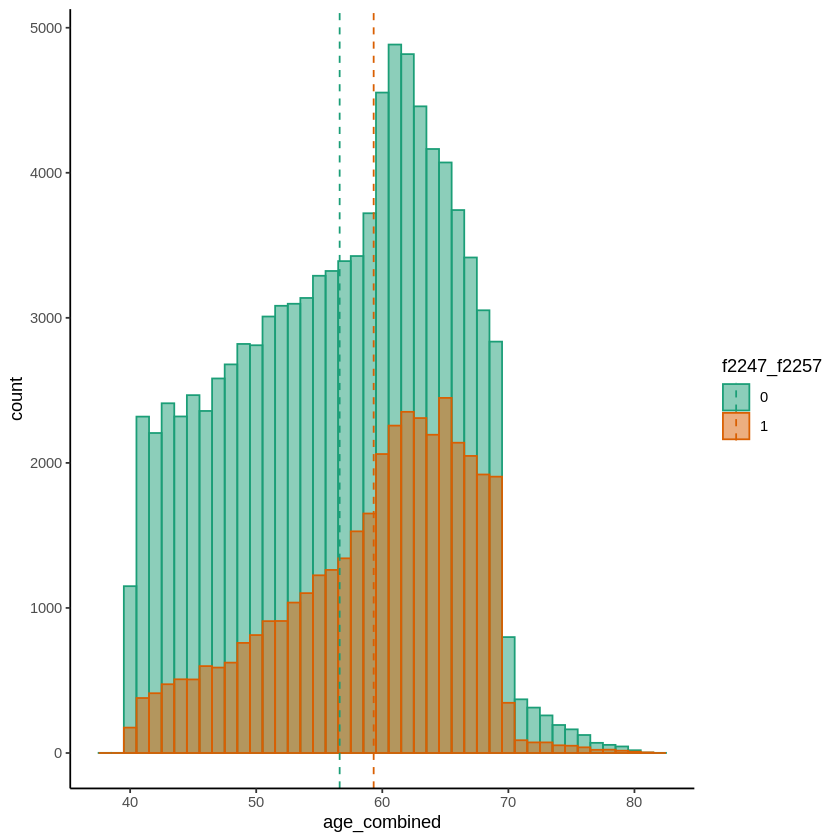

In [193]:
ggplot(f2247_f2257_pheno, aes(x=age_combined, fill=f2247_f2257, color=f2247_f2257)) +
 geom_histogram(binwidth=1, alpha=0.5, position="identity")+
  scale_color_brewer(palette="Dark2")+
  scale_fill_brewer(palette="Dark2") +
  theme(legend.position="top") +
  geom_vline(data=mu7, aes(xintercept=grp.mean, color=f2247_f2257),
             linetype="dashed") +
  theme_classic()

In [194]:
length(which((f2247_f2257_pheno$f2247_f2257=="0" & f2247_f2257_pheno$age_combined <50)))

[1] 23314

In [195]:
length(which((f2247_f2257_pheno$f2247_f2257=="1" & f2247_f2257_pheno$age_combined <50)))

[1] 5025

In [196]:
mu8 <- ddply(f2247_f2257_pheno, "sex", summarise, grp.mean=mean(age_combined))
head(mu8)

,sex,grp.mean
,<fct>,<dbl>
1,1,57.19543
2,0,57.63699


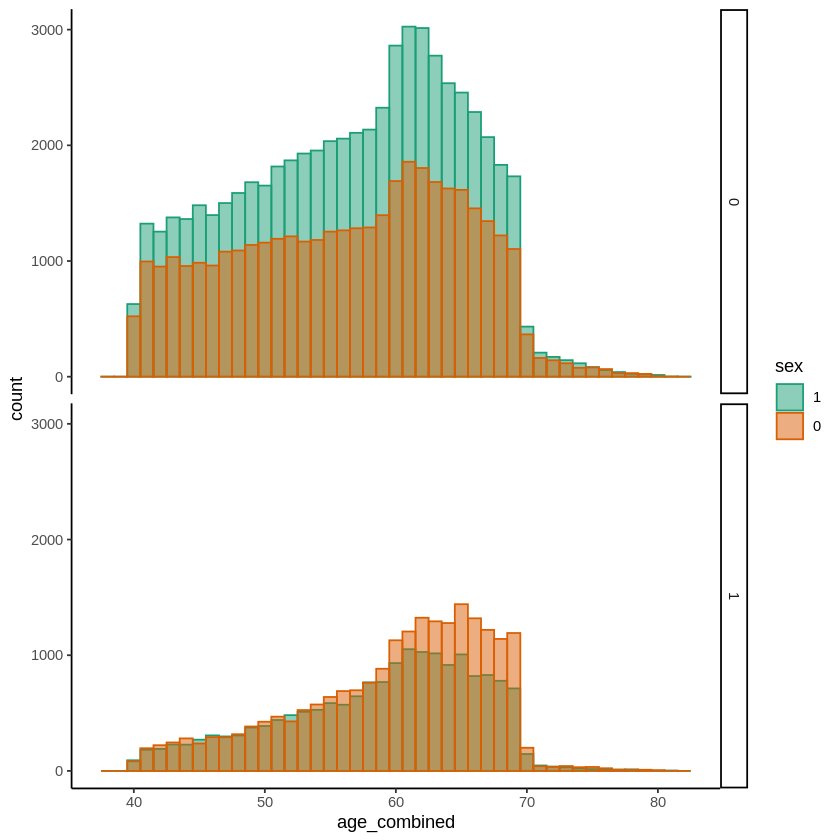

In [197]:
ggplot(f2247_f2257_pheno, aes(x=age_combined, fill=sex, color=sex)) +
 geom_histogram(binwidth=1, alpha=0.5, position="identity")+
  scale_color_brewer(palette="Dark2")+
  scale_fill_brewer(palette="Dark2") +
  theme(legend.position="top") +
  theme_classic() +
  facet_grid(f2247_f2257 ~ .)

In [198]:
#Summary age of cases and controls
tapply(f2247_f2257_pheno$age_combined,  f2247_f2257_pheno$f2247_f2257, summary)

$`0`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  38.00   50.00   58.00   56.62   63.00   82.00 

$`1`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  40.00   55.00   61.00   59.32   65.00   81.00 


## Find out controls positive for  f.3393

In [199]:
control_check_combined <- df_3393_2247_2257_combined %>%
    filter(f2247_f2257==0) %>%
    select(FID, IID, age_combined, sex, f2247_f2257, starts_with("f.3393")) %>%
    mutate(remove_3393 = apply(select(.,starts_with("f.3393")), 1, function(x) length(which(x == "Yes")) > 0))
head(control_check_combined)
dim(control_check_combined)

,FID,IID,age_combined,sex,f2247_f2257,f.3393.0.0,f.3393.1.0,f.3393.2.0,f.3393.3.0,f.3393.0.0_recode,f.3393.1.0_recode,f.3393.2.0_recode,f.3393.3.0_recode,remove_3393
,<int>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<lgl>
1,1000078,1000078,60,1,0,NA,No,No,NA,NA,0,0,NA,FALSE
2,1000081,1000081,67,0,0,No,NA,NA,NA,0,NA,NA,NA,FALSE
3,1000224,1000224,58,1,0,NA,NA,NA,NA,NA,NA,NA,NA,FALSE
4,1000236,1000236,70,0,0,No,NA,No,NA,0,NA,0,NA,FALSE
5,1000255,1000255,61,1,0,No,NA,No,NA,0,NA,0,NA,FALSE
6,1000291,1000291,62,0,0,NA,NA,NA,NA,NA,NA,NA,NA,FALSE


[1] 98012    14

In [200]:
length(which(control_check_combined$remove_3393==TRUE)) #controls that replied yes to f.3393

[1] 2

### Export file white-British

In [162]:
write.table(f2247_f2257_pheno, '200828_UKBB_f2247_f2257', quote = FALSE, row.names = FALSE)

### Export file white expanded

In [162]:
write.table(f2247_f2257_pheno, '120120_UKBB_f2247_f2257_expandedwhite', quote = FALSE, row.names = FALSE)

### Export exome data

In [171]:
write.table(f2247_f2257_pheno, 'phenotypes_exome_data/010421_UKBB_f2247_f2257_136862ind_exomes', quote = FALSE, row.names = FALSE)

## Controls negative for f.2247 & f.2257 & f.3393

In [201]:
pure_controls <- df_3393_2247_2257_combined %>%
    select(FID, IID, sex, hearing_aid_cat_new, age_final_aid, hearing_diff_new, age_final_diff_new, hearing_noise_cat, age_final_noise, f2247_f2257, age_combined) %>%
    mutate(control_pure= case_when((hearing_aid_cat_new=="0" & hearing_diff_new =="0" & hearing_noise_cat =="0") ~ "pure_control", TRUE ~ "other")) %>%
    mutate(control_na = case_when((hearing_diff_new =="0" & hearing_noise_cat =="0" & (is.na(hearing_aid_cat_new) | hearing_aid_cat_new=="0")) ~ "control_na", TRUE ~ "other")) %>%
    mutate(f3393_ctrl_pure = case_when((hearing_aid_cat_new=="1" & control_pure=="other") ~ "1",
                             (hearing_aid_cat_new=="0" & control_pure=="pure_control") ~ "0", TRUE ~ "NA")) %>%
    mutate(f3393_ctrl_na = case_when((hearing_aid_cat_new=="1" & control_na=="other") ~ "1",
                             (hearing_aid_cat_new %in% c("0", NA) & control_na=="control_na") ~ "0", TRUE ~ "NA")) %>%
    mutate(f2247_ctrl_pure = case_when((hearing_diff_new=="1" & control_pure=="other") ~ "1",
                             (hearing_diff_new=="0" & control_pure=="pure_control") ~ "0", TRUE ~ "NA")) %>%
    mutate(f2247_ctrl_na = case_when((hearing_diff_new=="1" & control_na=="other") ~ "1",
                             (hearing_diff_new == "0" & control_na=="control_na") ~ "0", TRUE ~ "NA")) %>% 
    mutate(f2257_ctrl_pure = case_when((hearing_noise_cat=="1" & control_pure=="other") ~ "1",
                             (hearing_noise_cat=="0" & control_pure=="pure_control") ~ "0", TRUE ~ "NA")) %>%
    mutate(f2257_ctrl_na = case_when((hearing_noise_cat=="1" & control_na=="other") ~ "1",
                             (hearing_noise_cat == "0" & control_na=="control_na") ~ "0", TRUE ~ "NA")) %>%
    mutate(f2247_f2257_ctrl_pure = case_when((f2247_f2257=="1" & control_pure=="other") ~ "1",
                             (f2247_f2257=="0" & control_pure=="pure_control") ~ "0", TRUE ~ "NA")) %>%
    mutate(f2247_f2257_ctrl_na = case_when((f2247_f2257=="1" & control_na=="other") ~ "1",
                             (f2247_f2257 == "0" & control_na=="control_na") ~ "0", TRUE ~ "NA"))

head(pure_controls, 100)
nrow(pure_controls)

,FID,IID,sex,hearing_aid_cat_new,age_final_aid,hearing_diff_new,age_final_diff_new,hearing_noise_cat,age_final_noise,f2247_f2257,⋯,control_pure,control_na,f3393_ctrl_pure,f3393_ctrl_na,f2247_ctrl_pure,f2247_ctrl_na,f2257_ctrl_pure,f2257_ctrl_na,f2247_f2257_ctrl_pure,f2247_f2257_ctrl_na
,<int>,<int>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<int>,<int>,<fct>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1000019,1000019,1,0,47,1,47,1,47,1,⋯,other,other,NA,NA,1,1,1,1,1,1
2,1000035,1000035,0,0,63,0,63,1,63,NA,⋯,other,other,NA,NA,NA,NA,1,1,NA,NA
3,1000078,1000078,1,0,60,0,60,0,60,0,⋯,pure_control,control_na,0,0,0,0,0,0,0,0
4,1000081,1000081,0,0,67,0,67,0,67,0,⋯,pure_control,control_na,0,0,0,0,0,0,0,0
5,1000198,1000198,1,0,41,1,41,1,41,1,⋯,other,other,NA,NA,1,1,1,1,1,1
6,1000210,1000210,0,NA,NA,NA,NA,0,66,NA,⋯,other,other,NA,NA,NA,NA,NA,NA,NA,NA
7,1000224,1000224,1,NA,NA,0,58,0,58,0,⋯,other,control_na,NA,0,NA,0,NA,0,NA,0
8,1000236,1000236,0,0,70,0,70,0,70,0,⋯,pure_control,control_na,0,0,0,0,0,0,0,0
9,1000255,1000255,1,0,61,0,61,0,61,0,⋯,pure_control,control_na,0,0,0,0,0,0,0,0


[1] 182761

In [202]:
df1 <- pure_controls %>% filter(is.na(age_final_aid)) %>% select('IID','hearing_aid_cat_new', "age_final_aid")

In [203]:
nrow(df1 %>% filter(is.na(hearing_aid_cat_new)))

[1] 54100

In [204]:
nrow(pure_controls %>% filter(hearing_aid_cat_new=='0'))

[1] 122271

In [205]:
nrow(pure_controls %>% filter(hearing_aid_cat_new=='1'))

[1] 6390

In [219]:
write.table(pure_controls, '043021_UKBB_f3393_f2247_f2257_combined_controls2sets', quote = FALSE, row.names = FALSE)

In [206]:
nrow(pure_controls %>% filter(control_pure == "pure_control"))

[1] 46717

## Age of pure controls

In [207]:
age_pure <- pure_controls %>% 
        filter(control_pure == "pure_control") %>%
        mutate(max_age=pmax(age_final_aid,age_final_diff_new,age_final_noise))
nrow(age_pure)

[1] 46717

In [208]:
diff_age_pure1 <- age_pure[age_pure$age_final_aid!=age_pure$age_final_diff_new, ]
nrow(diff_age_pure1)

[1] 5

In [209]:
diff_age_pure1

,FID,IID,sex,hearing_aid_cat_new,age_final_aid,hearing_diff_new,age_final_diff_new,hearing_noise_cat,age_final_noise,f2247_f2257,⋯,control_na,f3393_ctrl_pure,f3393_ctrl_na,f2247_ctrl_pure,f2247_ctrl_na,f2257_ctrl_pure,f2257_ctrl_na,f2247_f2257_ctrl_pure,f2247_f2257_ctrl_na,max_age
,<int>,<int>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<int>,<int>,<fct>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
6872,1740024,1740024,0,0,46,0,41,0,46,0,⋯,control_na,0,0,0,0,0,0,0,0,46
24584,3659414,3659414,1,0,73,0,64,0,64,0,⋯,control_na,0,0,0,0,0,0,0,0,73
43391,5668953,5668953,1,0,69,0,74,0,69,0,⋯,control_na,0,0,0,0,0,0,0,0,74
44240,5762579,5762579,0,0,78,0,68,0,68,0,⋯,control_na,0,0,0,0,0,0,0,0,78
45289,5872104,5872104,1,0,67,0,61,0,61,0,⋯,control_na,0,0,0,0,0,0,0,0,67


In [210]:
diff_age_pure2 <- age_pure[age_pure$age_final_aid!=age_pure$age_final_noise, ]
nrow(diff_age_pure2)
diff_age_pure2

[1] 3

,FID,IID,sex,hearing_aid_cat_new,age_final_aid,hearing_diff_new,age_final_diff_new,hearing_noise_cat,age_final_noise,f2247_f2257,⋯,control_na,f3393_ctrl_pure,f3393_ctrl_na,f2247_ctrl_pure,f2247_ctrl_na,f2257_ctrl_pure,f2257_ctrl_na,f2247_f2257_ctrl_pure,f2247_f2257_ctrl_na,max_age
,<int>,<int>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<int>,<int>,<fct>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
24584,3659414,3659414,1,0,73,0,64,0,64,0,⋯,control_na,0,0,0,0,0,0,0,0,73
44240,5762579,5762579,0,0,78,0,68,0,68,0,⋯,control_na,0,0,0,0,0,0,0,0,78
45289,5872104,5872104,1,0,67,0,61,0,61,0,⋯,control_na,0,0,0,0,0,0,0,0,67


In [211]:
diff_age_pure3 <- age_pure[age_pure$age_final_diff_new!=age_pure$age_final_noise, ]
nrow(diff_age_pure3)
diff_age_pure3

[1] 2

,FID,IID,sex,hearing_aid_cat_new,age_final_aid,hearing_diff_new,age_final_diff_new,hearing_noise_cat,age_final_noise,f2247_f2257,⋯,control_na,f3393_ctrl_pure,f3393_ctrl_na,f2247_ctrl_pure,f2247_ctrl_na,f2257_ctrl_pure,f2257_ctrl_na,f2247_f2257_ctrl_pure,f2247_f2257_ctrl_na,max_age
,<int>,<int>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<int>,<int>,<fct>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
6872,1740024,1740024,0,0,46,0,41,0,46,0,⋯,control_na,0,0,0,0,0,0,0,0,46
43391,5668953,5668953,1,0,69,0,74,0,69,0,⋯,control_na,0,0,0,0,0,0,0,0,74


In [212]:
mean(age_pure[["max_age"]])

[1] 57.54509

## Age of controls_na

In [213]:
age_controls_na <- pure_controls %>% 
        filter(control_na == "control_na") %>%
        mutate(max_age_control_na=pmax(age_final_aid,age_final_diff_new,age_final_noise))
nrow(age_controls_na)

[1] 98012

In [214]:
mean(age_controls_na[["max_age_control_na"]])

[1] 57.54509

In [215]:
nrow(pure_controls %>% filter(control_na == "control_na"))

[1] 98012

In [216]:
#Number of cases of either f3393, f2257, or f2247

cases_either_trait<- df_3393_2247_2257_combined %>%
    select(FID, IID, sex, hearing_aid_cat_new, age_final_aid, hearing_diff_new, age_final_diff_new, hearing_noise_cat, age_final_noise, f2247_f2257, age_combined) %>%
    mutate(case_either_trait= case_when((hearing_aid_cat_new=="1" | hearing_diff_new =="1" | hearing_noise_cat =="1") ~ "case", TRUE ~ "control")) %>%
    filter(case_either_trait=="case")
nrow(cases_either_trait)

[1] 75905

In [217]:
head(cases_either_trait, 30)

,FID,IID,sex,hearing_aid_cat_new,age_final_aid,hearing_diff_new,age_final_diff_new,hearing_noise_cat,age_final_noise,f2247_f2257,age_combined,case_either_trait
,<int>,<int>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<int>,<int>,<fct>,<int>,<chr>
1,1000019,1000019,1,0,47,1,47,1,47,1,47,case
2,1000035,1000035,0,0,63,0,63,1,63,NA,NA,case
3,1000198,1000198,1,0,41,1,41,1,41,1,41,case
4,1000304,1000304,1,0,56,0,56,1,56,NA,NA,case
5,1000396,1000396,0,0,48,1,48,1,48,1,48,case
6,1000494,1000494,0,0,61,1,61,1,61,1,61,case
7,1000551,1000551,0,0,68,NA,NA,1,68,NA,NA,case
8,1000817,1000817,0,0,58,0,58,1,58,NA,NA,case
9,1000875,1000875,0,0,59,NA,NA,1,59,NA,NA,case


## Total number of cases/controls for f.3393 using pure controls

In [218]:
nrow(pure_controls %>% filter(f3393_ctrl_pure == "1"))
nrow(pure_controls %>% filter(f3393_ctrl_pure == "0"))

[1] 6390

[1] 46717

In [219]:
nrow(pure_controls %>% filter(f3393_ctrl_na == "1"))
nrow(pure_controls %>% filter(f3393_ctrl_na == "0"))

[1] 6390

[1] 98012

## Total number of cases/controls for f.2247 using pure controls

In [220]:
nrow(pure_controls %>% filter(f2247_ctrl_pure == "1"))
nrow(pure_controls %>% filter(f2247_ctrl_pure == "0"))

[1] 46940

[1] 46717

In [221]:
nrow(pure_controls %>% filter(f2247_ctrl_na== "1"))
nrow(pure_controls %>% filter(f2247_ctrl_na == "0"))

[1] 46940

[1] 98012

## Total number of cases/controls for f.2257 using pure controls

In [222]:
nrow(pure_controls %>% filter(f2257_ctrl_pure == "1"))
nrow(pure_controls %>% filter(f2257_ctrl_pure == "0"))

[1] 68187

[1] 46717

In [223]:
nrow(pure_controls %>% filter(f2257_ctrl_na== "1"))
nrow(pure_controls %>% filter(f2257_ctrl_na == "0"))

[1] 68187

[1] 98012

## Total number of cases/controls for combined phenotype f2247 & f2257 using pure controls

In [250]:
nrow(pure_controls %>% filter(f2247_f2257_ctrl_pure == "1"))
nrow(pure_controls %>% filter(f2247_f2257_ctrl_pure == "0"))

[1] 39233

[1] 46717

In [251]:
nrow(pure_controls %>% filter(f2247_f2257_ctrl_na == "1"))
nrow(pure_controls %>% filter(f2247_f2257_ctrl_na == "0"))

[1] 39233

[1] 98012

## Creation of phenotype files with the 2 different sets of controls

In [224]:
f3393_ctrl_pure <- pure_controls %>%
    filter(!(f3393_ctrl_pure == "NA")) %>%
    select(FID,IID, sex,f3393_ctrl_pure, age_final_aid)
head(f3393_ctrl_pure)
nrow(f3393_ctrl_pure)

,FID,IID,sex,f3393_ctrl_pure,age_final_aid
,<int>,<int>,<fct>,<chr>,<dbl>
1,1000078,1000078,1,0,60
2,1000081,1000081,0,0,67
3,1000236,1000236,0,0,70
4,1000255,1000255,1,0,61
5,1000331,1000331,1,0,53
6,1000340,1000340,1,0,54


[1] 53107

In [225]:
length(which(is.na(f3393_ctrl_pure$age_final_aid)))

[1] 0

In [392]:
write.table(f3393_ctrl_pure, '041521_UKBB_Hearing_aid_f3393_expandedwhite_z974included_pure_ctrl_97258ind', quote = FALSE, row.names = FALSE)

## File for exome data

In [226]:
write.table(f3393_ctrl_pure, '062421_UKBB_Hearing_aid_f3393_expandedwhite_z974included_pure_ctrl_53107ind', quote = FALSE, row.names = FALSE)

In [227]:
f3393_ctrl_na <- pure_controls %>%
    filter(!(f3393_ctrl_na == "NA")) %>%
    select(FID,IID, sex, f3393_ctrl_na, age_final_aid)
head(f3393_ctrl_na)
nrow(f3393_ctrl_na)

,FID,IID,sex,f3393_ctrl_na,age_final_aid
,<int>,<int>,<fct>,<chr>,<dbl>
1,1000078,1000078,1,0,60
2,1000081,1000081,0,0,67
3,1000224,1000224,1,0,NA
4,1000236,1000236,0,0,70
5,1000255,1000255,1,0,61
6,1000291,1000291,0,0,NA


[1] 104402

In [228]:
# Create a dataset that has the controls_na with the correct age
f3393_ctrl_na_1 <- pure_controls %>%
    filter(!(f3393_ctrl_na == "NA")) %>%
    filter(is.na(hearing_aid_cat_new)) %>%
    mutate(age_aid =pmax(age_final_diff_new,age_final_noise)) %>%
    select(FID,IID, sex, f3393_ctrl_na, age_aid)
head(f3393_ctrl_na_1, 100)
nrow(f3393_ctrl_na_1)

,FID,IID,sex,f3393_ctrl_na,age_aid
,<int>,<int>,<fct>,<chr>,<dbl>
1,1000224,1000224,1,0,58
2,1000291,1000291,0,0,62
3,1000415,1000415,0,0,65
4,1000674,1000674,0,0,41
5,1000701,1000701,1,0,58
6,1000752,1000752,1,0,53
7,1000858,1000858,0,0,61
8,1000889,1000889,1,0,55
9,1001118,1001118,1,0,58


[1] 51295

In [229]:
f3393_ctrl_na_2  <- pure_controls %>%
    filter(!(f3393_ctrl_na == "NA")) %>%
    filter(!is.na(hearing_aid_cat_new)) %>%
    mutate(age_aid = age_final_aid) %>%
    select(FID,IID, sex, f3393_ctrl_na, age_aid)
head(f3393_ctrl_na_2, 100)
nrow(f3393_ctrl_na_2)

,FID,IID,sex,f3393_ctrl_na,age_aid
,<int>,<int>,<fct>,<chr>,<dbl>
1,1000078,1000078,1,0,60
2,1000081,1000081,0,0,67
3,1000236,1000236,0,0,70
4,1000255,1000255,1,0,61
5,1000331,1000331,1,0,53
6,1000340,1000340,1,0,54
7,1000357,1000357,1,0,69
8,1000421,1000421,1,0,64
9,1000439,1000439,1,0,59


[1] 53107

In [230]:
#Merge the 2 datasets fro f3393 with ages fixed
f3393_ctrl_na <- rbind(f3393_ctrl_na_1,f3393_ctrl_na_2) 
nrow(f3393_ctrl_na)

[1] 104402

In [231]:
length(which(is.na(f3393_ctrl_na$age_aid)))

[1] 0

In [293]:
write.table(f3393_ctrl_na, '041521_UKBB_Hearing_aid_f3393_expandedwhite_z974included_ctrl_na_228760ind', quote = FALSE, row.names = FALSE)

## File for exome data

In [232]:
write.table(f3393_ctrl_na, '062421_UKBB_Hearing_aid_f3393_expandedwhite_z974included_ctrl_na_104402ind', quote = FALSE, row.names = FALSE)

In [233]:
f2247_ctrl_pure <- pure_controls %>%
    filter(!(f2247_ctrl_pure == "NA")) %>%
    select(FID,IID, sex,f2247_ctrl_pure, age_final_diff_new)
head(f2247_ctrl_pure)
nrow(f2247_ctrl_pure)

,FID,IID,sex,f2247_ctrl_pure,age_final_diff_new
,<int>,<int>,<fct>,<chr>,<dbl>
1,1000019,1000019,1,1,47
2,1000078,1000078,1,0,60
3,1000081,1000081,0,0,67
4,1000198,1000198,1,1,41
5,1000236,1000236,0,0,70
6,1000255,1000255,1,0,61


[1] 93657

In [394]:
write.table(f2247_ctrl_pure , '041521_UKBB_Hearing_difficulty_f2247_expandedwhite_z974included_pure_ctrl_184909ind', quote = FALSE, row.names = FALSE)

## File for exome data

In [235]:
write.table(f2247_ctrl_pure , '062421_UKBB_Hearing_difficulty_f2247_expandedwhite_z974included_pure_ctrl_93657ind', quote = FALSE, row.names = FALSE)

In [236]:
f2247_ctrl_na <- pure_controls %>%
    filter(!(f2247_ctrl_na == "NA")) %>%
    select(FID,IID, sex,f2247_ctrl_na, age_final_diff_new)
head(f2247_ctrl_na)
nrow(f2247_ctrl_na)

,FID,IID,sex,f2247_ctrl_na,age_final_diff_new
,<int>,<int>,<fct>,<chr>,<dbl>
1,1000019,1000019,1,1,47
2,1000078,1000078,1,0,60
3,1000081,1000081,0,0,67
4,1000198,1000198,1,1,41
5,1000224,1000224,1,0,58
6,1000236,1000236,0,0,70


[1] 144952

In [395]:
write.table(f2247_ctrl_na , '041521_UKBB_Hearing_difficulty_f2247_expandedwhite_z974included_ctrl_na_316411ind', quote = FALSE, row.names = FALSE)

## File for exome data

In [237]:
write.table(f2247_ctrl_na , '062421_UKBB_Hearing_difficulty_f2247_expandedwhite_z974included_ctrl_na_144952ind', quote = FALSE, row.names = FALSE)

In [238]:
f2257_ctrl_pure <- pure_controls %>%
    filter(!(f2257_ctrl_pure == "NA")) %>%
    select(FID,IID, sex,f2257_ctrl_pure, age_final_noise)
head(f2257_ctrl_pure)
nrow(f2257_ctrl_pure)

,FID,IID,sex,f2257_ctrl_pure,age_final_noise
,<int>,<int>,<fct>,<chr>,<int>
1,1000019,1000019,1,1,47
2,1000035,1000035,0,1,63
3,1000078,1000078,1,0,60
4,1000081,1000081,0,0,67
5,1000198,1000198,1,1,41
6,1000236,1000236,0,0,70


[1] 114904

In [396]:
write.table(f2257_ctrl_pure, '041521_UKBB_Hearing_background_noise_f2257_expandedwhite_z974included_pure_ctrl_232101ind', quote = FALSE, row.names = FALSE)

## File for exome data

In [239]:
write.table(f2257_ctrl_pure, '062421_UKBB_Hearing_background_noise_f2257_expandedwhite_z974included_pure_ctrl_114904ind', quote = FALSE, row.names = FALSE)

In [240]:
f2257_ctrl_na <- pure_controls %>%
    filter(!(f2257_ctrl_na == "NA")) %>%
    select(FID,IID, sex,f2257_ctrl_na, age_final_noise)
head(f2257_ctrl_na)
nrow(f2257_ctrl_na)

,FID,IID,sex,f2257_ctrl_na,age_final_noise
,<int>,<int>,<fct>,<chr>,<int>
1,1000019,1000019,1,1,47
2,1000035,1000035,0,1,63
3,1000078,1000078,1,0,60
4,1000081,1000081,0,0,67
5,1000198,1000198,1,1,41
6,1000224,1000224,1,0,58


[1] 166199

In [397]:
write.table(f2257_ctrl_na, '041521_UKBB_Hearing_background_noise_f2257_expandedwhite_z974included_ctrl_na_363603ind', quote = FALSE, row.names = FALSE)

## File for exome data

In [241]:
write.table(f2257_ctrl_na, '062421_UKBB_Hearing_background_noise_f2257_expandedwhite_z974included_ctrl_na_166199ind', quote = FALSE, row.names = FALSE)

In [242]:
f2247_f2257_ctrl_pure  <- pure_controls %>%
    filter(!(f2247_f2257_ctrl_pure == "NA")) %>%
    select(FID,IID, sex,f2247_f2257_ctrl_pure, age_combined)
head(f2247_f2257_ctrl_pure)
nrow(f2247_f2257_ctrl_pure)

,FID,IID,sex,f2247_f2257_ctrl_pure,age_combined
,<int>,<int>,<fct>,<chr>,<int>
1,1000019,1000019,1,1,47
2,1000078,1000078,1,0,60
3,1000081,1000081,0,0,67
4,1000198,1000198,1,1,41
5,1000236,1000236,0,0,70
6,1000255,1000255,1,0,61


[1] 85950

In [398]:
write.table(f2247_f2257_ctrl_pure, '041521_UKBB_f2247_f2257_expandedwhite_z974included_pure_ctrl_168414ind', quote = FALSE, row.names = FALSE)

## File for exome data

In [243]:
write.table(f2247_f2257_ctrl_pure, '062421_UKBB_f2247_f2257_expandedwhite_z974included_pure_ctrl_85950ind', quote = FALSE, row.names = FALSE)

In [244]:
f2247_f2257_ctrl_na  <- pure_controls %>%
    filter(!(f2247_f2257_ctrl_na == "NA")) %>%
    select(FID,IID, sex,f2247_f2257_ctrl_na, age_combined)
head(f2247_f2257_ctrl_na)
nrow(f2247_f2257_ctrl_na)

,FID,IID,sex,f2247_f2257_ctrl_na,age_combined
,<int>,<int>,<fct>,<chr>,<int>
1,1000019,1000019,1,1,47
2,1000078,1000078,1,0,60
3,1000081,1000081,0,0,67
4,1000198,1000198,1,1,41
5,1000224,1000224,1,0,58
6,1000236,1000236,0,0,70


[1] 137245

In [399]:
write.table(f2247_f2257_ctrl_na, '041521_UKBB_f2247_f2257_expandedwhite_z974included_ctrl_na_299916ind', quote = FALSE, row.names = FALSE)

## File for exome data

In [245]:
write.table(f2247_f2257_ctrl_na, '062421_UKBB_f2247_f2257_expandedwhite_z974included_ctrl_na_137245ind', quote = FALSE, row.names = FALSE)

In [246]:
pure_controls_na <- df_3393_2247_2257_combined %>%
    select(FID, IID, sex, hearing_aid_cat_new, age_final_aid, hearing_diff_new, age_final_diff_new, hearing_noise_cat, age_final_noise, f2247_f2257, age_combined) %>%
    filter(hearing_diff_new =="0" & hearing_noise_cat =="0" & (is.na(hearing_aid_cat_new) | hearing_aid_cat_new=="0") )
head(pure_controls_na)
nrow(pure_controls_na)

,FID,IID,sex,hearing_aid_cat_new,age_final_aid,hearing_diff_new,age_final_diff_new,hearing_noise_cat,age_final_noise,f2247_f2257,age_combined
,<int>,<int>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<int>,<int>,<fct>,<int>
1,1000078,1000078,1,0,60,0,60,0,60,0,60
2,1000081,1000081,0,0,67,0,67,0,67,0,67
3,1000224,1000224,1,NA,NA,0,58,0,58,0,58
4,1000236,1000236,0,0,70,0,70,0,70,0,70
5,1000255,1000255,1,0,61,0,61,0,61,0,61
6,1000291,1000291,0,NA,NA,0,62,0,62,0,62


[1] 98012

In [247]:
hearing_aid_inconsistent <- df_3393_2247_2257_combined %>%
    select(FID, IID, sex, hearing_aid_cat_new, age_final_aid, hearing_diff_new,hearing_diff_cat, age_final_diff_new, hearing_noise_cat, age_final_noise, f2247_f2257, age_combined) %>%
    filter(hearing_aid_cat_new==1 & (hearing_diff_new ==0 | hearing_noise_cat ==0))
head(hearing_aid_inconsistent)
nrow(hearing_aid_inconsistent)

,FID,IID,sex,hearing_aid_cat_new,age_final_aid,hearing_diff_new,hearing_diff_cat,age_final_diff_new,hearing_noise_cat,age_final_noise,f2247_f2257,age_combined
,<int>,<int>,<fct>,<fct>,<dbl>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<int>
1,1011769,1011769,1,1,68,1,1,68,0,68,NA,NA
2,1078188,1078188,0,1,68,1,1,68,0,68,NA,NA
3,1131323,1131323,1,1,59,1,1,59,0,59,NA,NA
4,1131551,1131551,0,1,61,1,1,61,0,61,NA,NA
5,1133195,1133195,1,1,67,1,1,67,0,67,NA,NA
6,1137492,1137492,1,1,69,1,1,69,0,69,NA,NA


[1] 249

In [248]:
hearing_aid_inconsistent <- df_3393_2247_2257_combined %>%
    select(FID, IID, sex, hearing_aid_cat_new, age_final_aid, hearing_diff_new,hearing_diff_cat, age_final_diff_new, hearing_noise_cat, age_final_noise, f2247_f2257, age_combined) %>%
    filter(hearing_aid_cat_new==1 & hearing_noise_cat ==0)
head(hearing_aid_inconsistent)
nrow(hearing_aid_inconsistent)

,FID,IID,sex,hearing_aid_cat_new,age_final_aid,hearing_diff_new,hearing_diff_cat,age_final_diff_new,hearing_noise_cat,age_final_noise,f2247_f2257,age_combined
,<int>,<int>,<fct>,<fct>,<dbl>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<int>
1,1011769,1011769,1,1,68,1,1,68,0,68,NA,NA
2,1078188,1078188,0,1,68,1,1,68,0,68,NA,NA
3,1131323,1131323,1,1,59,1,1,59,0,59,NA,NA
4,1131551,1131551,0,1,61,1,1,61,0,61,NA,NA
5,1133195,1133195,1,1,67,1,1,67,0,67,NA,NA
6,1137492,1137492,1,1,69,1,1,69,0,69,NA,NA


[1] 249

In [390]:
head(df_3393_2247_2257_combined)

,IID,FID,ignore1,ignore2,ignore3,ignore4,f.31.0.0,f.34.0.0,f.53.0.0,f.53.1.0,⋯,age_final_aid,hearing_diff_cat,age_final_diff,hearing_diff_cat_new,hearing_aid_cat_new,hearing_diff_new,hearing_noise_cat,age_final_noise,f2247_f2257,age_combined
,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<int>,<fct>,<fct>,⋯,<int>,<int>,<int>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<int>
1,1000019,1000019,0,0,2,-9,Female,1960,2008-01-24,NA,⋯,47,1,47,case,control,1,1,47,1,47
2,1000022,1000022,0,0,1,-9,Male,1954,2008-01-22,NA,⋯,53,1,53,case,control,1,1,53,1,53
3,1000035,1000035,0,0,1,-9,Male,1944,2007-11-08,NA,⋯,63,0,63,control,control,0,1,63,NA,NA
4,1000046,1000046,0,0,2,-9,Female,1946,2008-12-01,NA,⋯,73,0,73,control,control,0,1,73,NA,NA
5,1000054,1000054,0,0,2,-9,Female,1942,2007-11-23,NA,⋯,65,0,65,control,control,0,1,65,NA,NA
6,1000063,1000063,0,0,1,-9,Male,1967,2010-06-26,NA,⋯,43,0,43,control,control,0,0,43,0,43


In [ ]:
hearing_aid_z974 <- df_3393_2247_2257_combined %>%
    select(FID, IID, sex, hearing_aid_cat, age_final_aid, hearing_diff_new, age_final_diff, hearing_noise_cat, age_final_noise, f2247_f2257, age_combined) %>%
    filter(IID %in% ICD10_z974$IID) %>%
    filter(is.na(hearing_aid_cat))
head(hearing_aid_z974)
nrow(hearing_aid_z974)